  **Project 1 - Getting Insights into an Unsupervised Dataset**


In [ ]:
# Setups and Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Data, Preprocessing, Initial Exploratory Analysis


In [ ]:
# Uploading the main csv
df_main=pd.read_csv('/content/Wholesale customers data.csv')                    # main CSV shared for Wholesale Customer data UCI
df_main.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
print(df_main['Channel'].value_counts())
print(df_main['Region'].value_counts())

Channel
1    298
2    142
Name: count, dtype: int64
Region
3    316
1     77
2     47
Name: count, dtype: int64


In [ ]:
# Drop irrelevant columns (Channel and Region)
df_main = df_main.drop(columns=['Channel', 'Region'])

In [ ]:
# Display the summary statistics of the dataset
print(df_main.describe())

               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


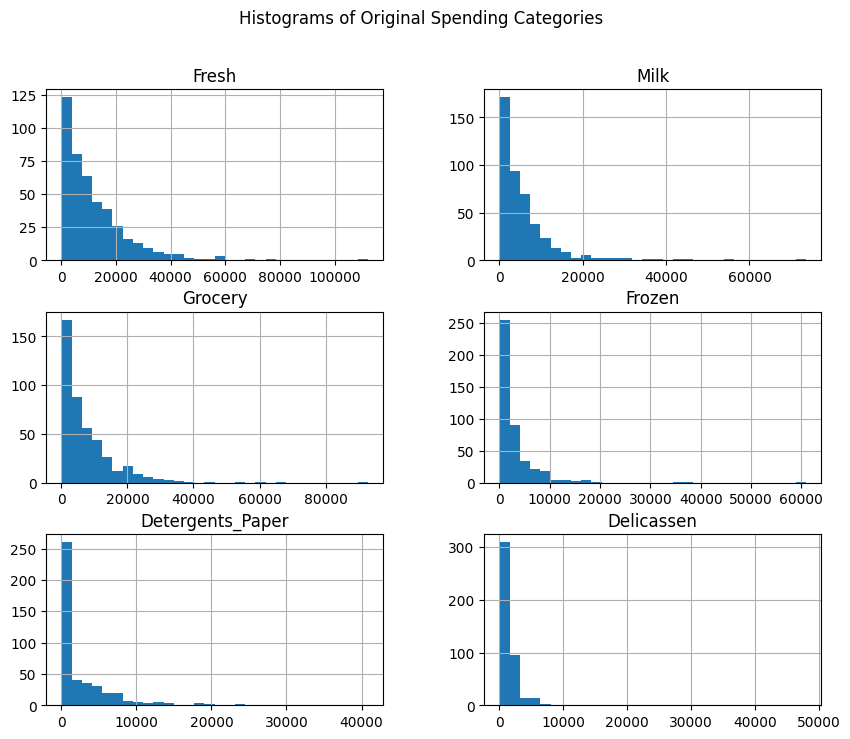

In [ ]:
# Plot histograms for each feature to interpret skewness
df_main.hist(bins=30, figsize=(10, 8))
plt.suptitle('Histograms of Original Spending Categories')
plt.show()

Text(0, 0.5, 'Spending')

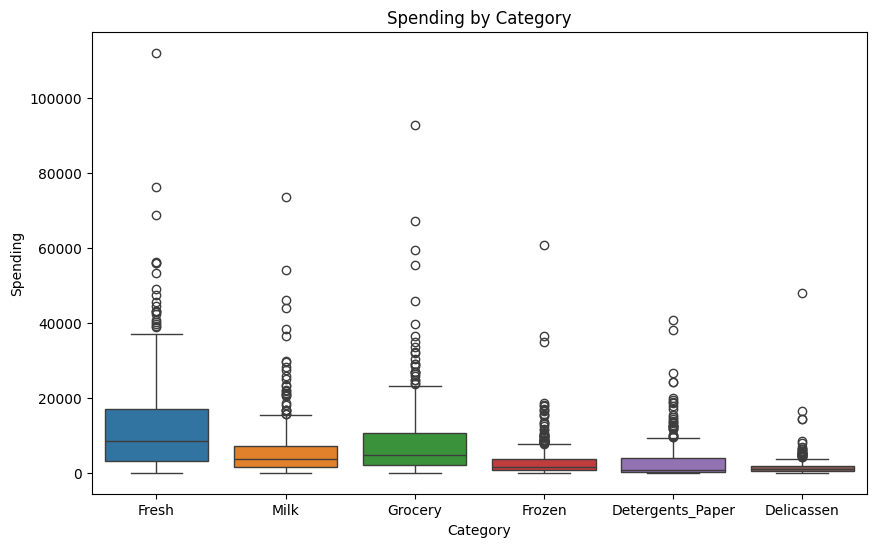

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_main)
plt.title('Spending by Category')
plt.xlabel('Category')
plt.ylabel('Spending')


In [ ]:
# Calculate skewness for each feature
from scipy.stats import skew
original_skewness = df_main.apply(skew)

In [ ]:
print("Skewness of each feature:")
print(original_skewness)

Skewness of each feature:
Fresh                2.552583
Milk                 4.039922
Grocery              3.575187
Frozen               5.887826
Detergents_Paper     3.619458
Delicassen          11.113534
dtype: float64


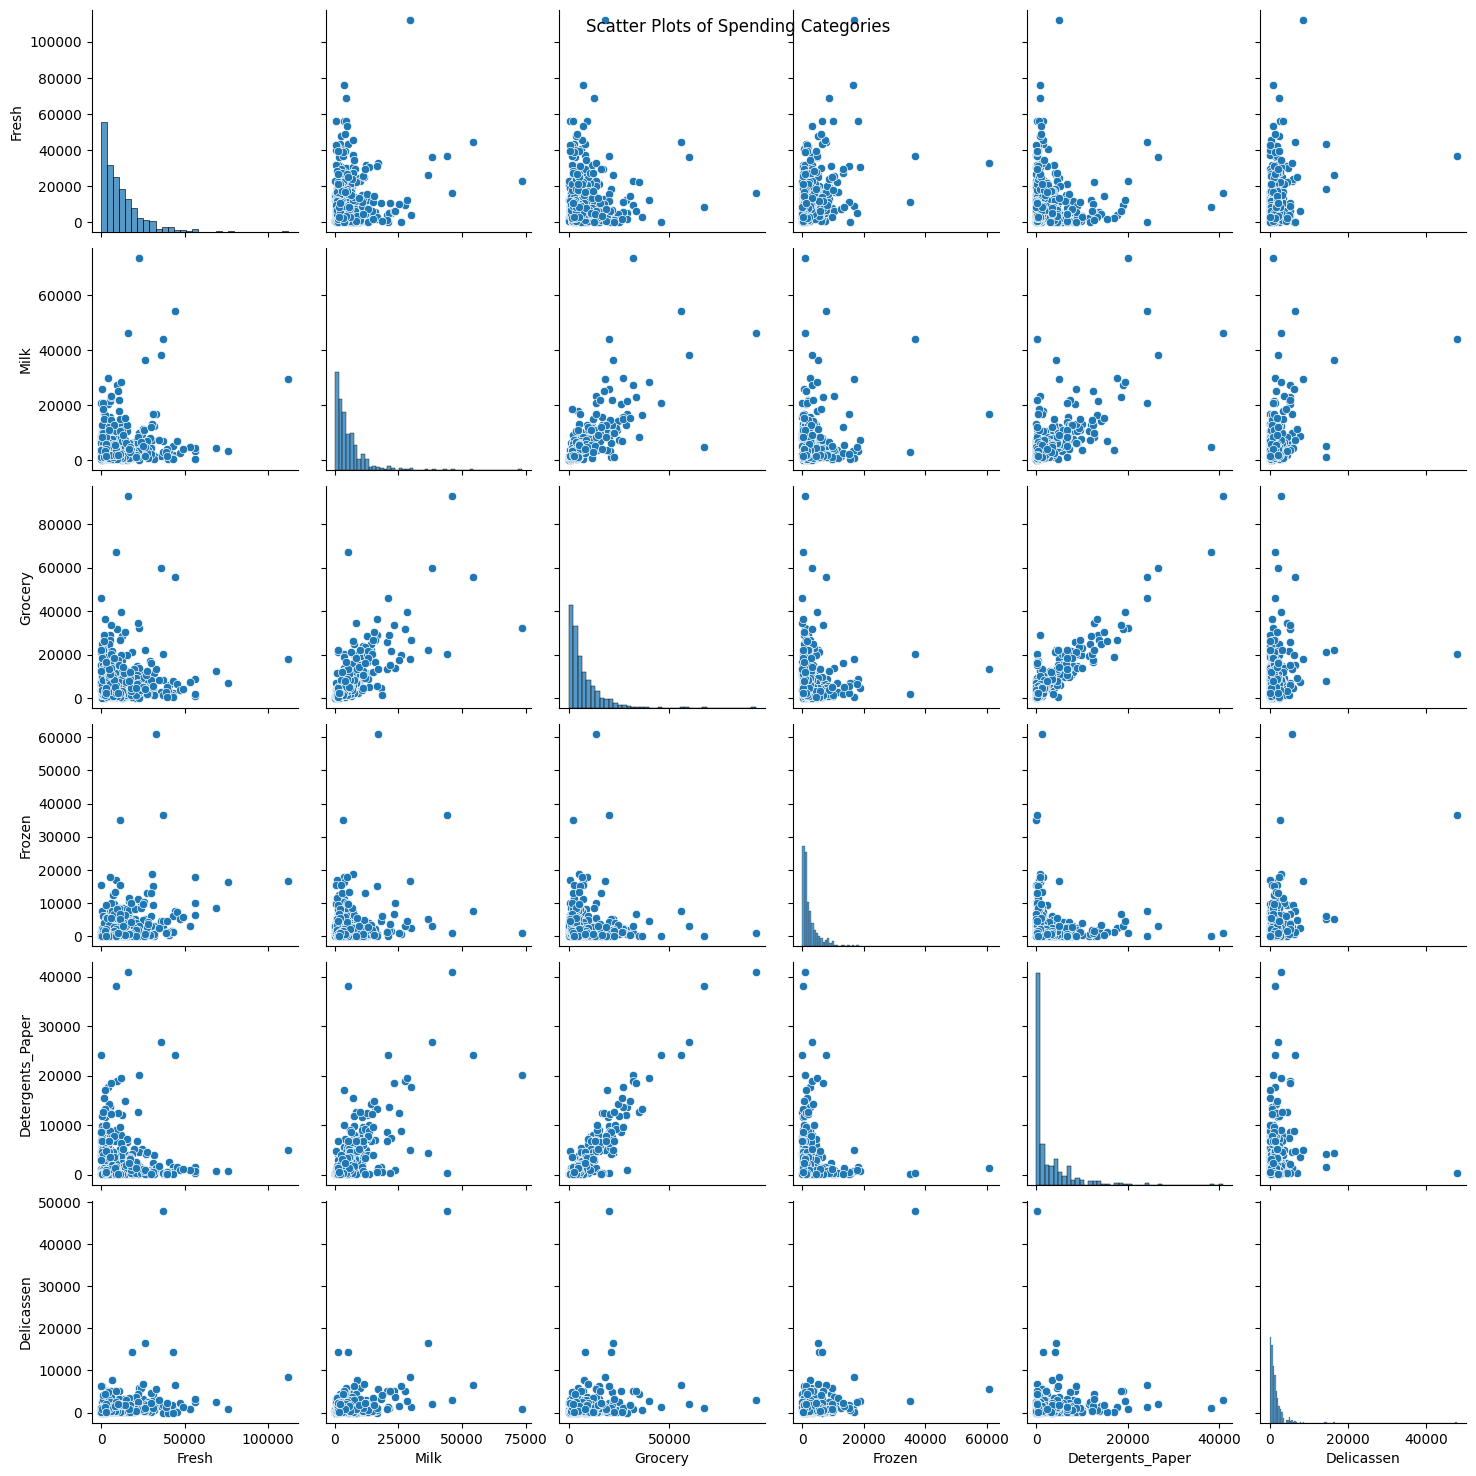

In [ ]:
# scatter plots to understand correlation between categories
sns.pairplot(df_main)
plt.suptitle('Scatter Plots of Spending Categories')
plt.show()

## Log Transformation with Offset value 10

### Why Choose Log 10 Instead of Log 1 for This Dataset

Log transformation is a widely used technique to normalize data, reduce skewness. The choice of the offset value theta in the log transformation plays a crucial role in handling zero values and adjusting the scale of the data.

#### Comparison of Offsets:
1. **Offset = 1:**
   - Handling Zero Values
   - Effect on Small Values
   - More suitable for small datasets

2. **Offset = 10:**
   - **Handling Zero Values:** Maps zero values to log(10) = 1, which shifts all values upward by 1 in the log scale.
   - **Effect on Small Values:** Small values are significantly shifted upward, which reduces the relative differences between them.
   - **Typical Use:** Appropriate when the data contains larger values overall, and we are more concerned with normalizing the distribution than preserving small value differences.

#### Reasons for Choosing Log 10:
1. Reduction in Skewness
2. Normalization of Larger Values
3. Robustness to Outliers
4. Improved Model Performance

5. **Interpretability:** While an offset of 1 preserves small values, an offset of 10 makes the overall data distribution easier to interpret by reducing the dominance of very small or zero values. This leads to clearer insights and better decision-making.



In [ ]:
# Apply log transformation with offset 10
log_df_main = np.log(df_main + 10)

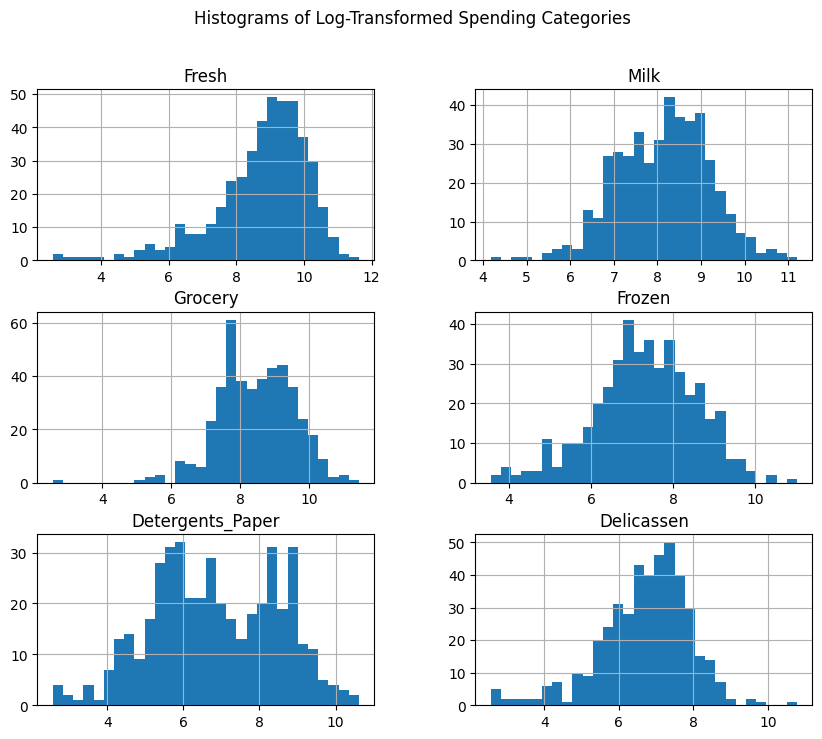

In [ ]:
# Plot histograms for log-transformed data
log_df_main.hist(bins=30, figsize=(10, 8))
plt.suptitle('Histograms of Log-Transformed Spending Categories')
plt.show()

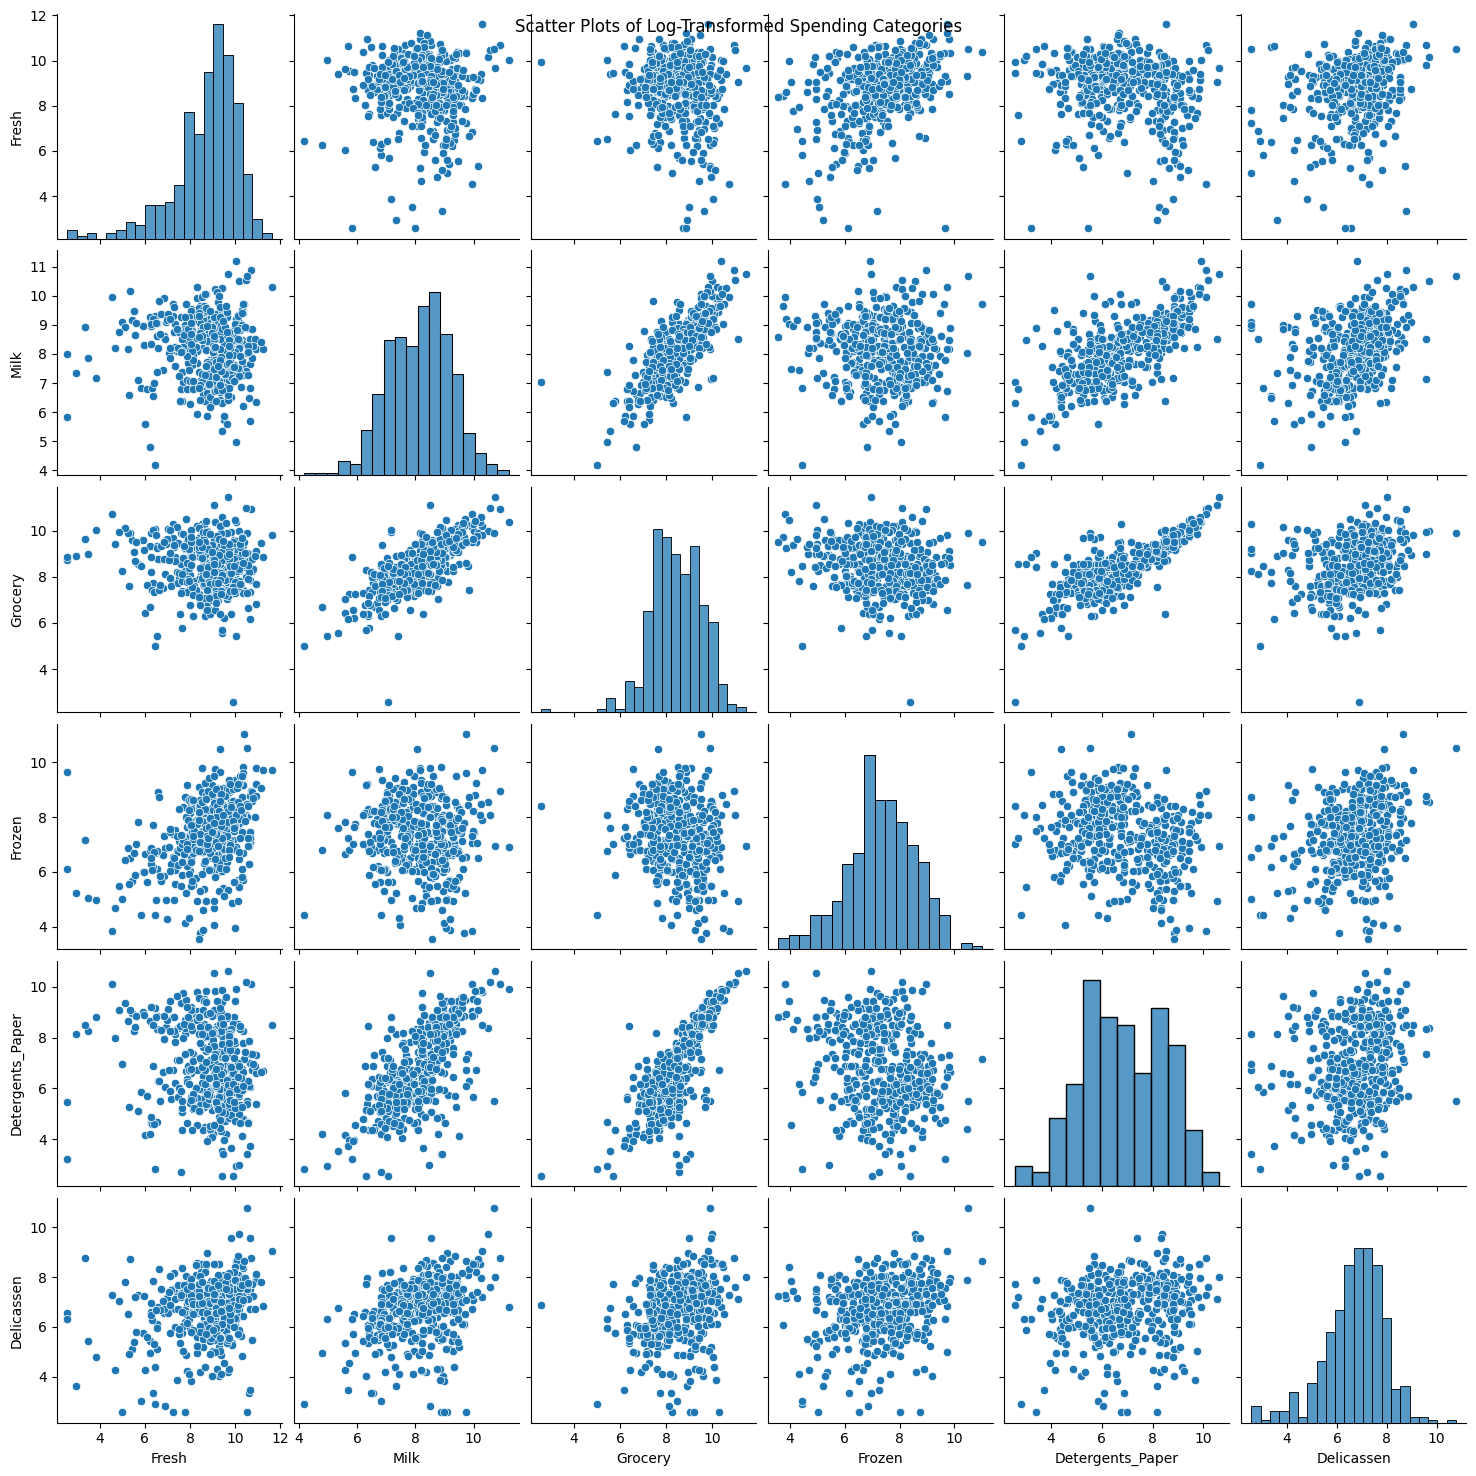

In [ ]:
# scatter plots for log-transformed data
sns.pairplot(log_df_main)
plt.suptitle('Scatter Plots of Log-Transformed Spending Categories')
plt.show()

In [ ]:
# skewness for each feature in the log-transformed data
log_skewness = log_df_main.apply(skew)

In [ ]:
# printing og-transformed data
print("Skewness of each feature after log transformation:")
print(log_skewness)

Skewness of each feature after log transformation:
Fresh              -1.346636
Milk               -0.199223
Grocery            -0.445073
Frozen             -0.287005
Detergents_Paper   -0.074045
Delicassen         -0.735275
dtype: float64


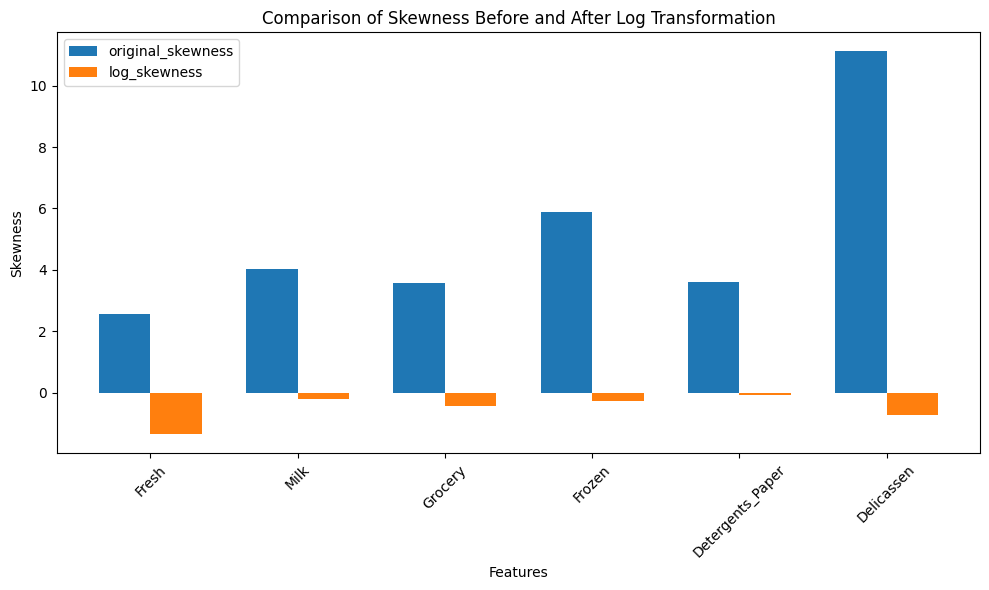

In [ ]:
# Visual comparison of skewness before and after log transformation
fig, ax = plt.subplots(figsize=(10, 6))

index = np.arange(len(original_skewness))
bar_width = 0.35

bar1 = plt.bar(index, original_skewness, bar_width, label='original_skewness')
bar2 = plt.bar(index + bar_width, log_skewness, bar_width, label='log_skewness')

plt.xlabel('Features')
plt.ylabel('Skewness')
plt.title('Comparison of Skewness Before and After Log Transformation')
plt.xticks(index + bar_width / 2, df_main.columns, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### Comparison of Skewness Values Before and After Log Transformation

| Feature            | Skewness (Original) | Skewness (Log-Transformed) | Impact on Analysis Goals                                                                                       |
|--------------------|---------------------|----------------------------|---------------------------------------------------------------------------------------------------------------|
| Fresh              | 2.552583            | -1.346636                  | The log transformation significantly reduces the skewness, leading to a more balanced distribution. This helps in minimizing the impact of outliers and improving the robustness of statistical analyses and machine learning models.                    |
| Milk               | 4.039922            | -0.199223                  | The skewness is greatly reduced, making the data more symmetric. This normalization enhances model performance by meeting the assumption of normality in many algorithms.                    |
| Grocery            | 3.575187            | -0.445073                  | The transformation reduces the skewness, resulting in a more even distribution. This helps in achieving more reliable and accurate analytical outcomes.                    |
| Frozen             | 5.887826            | -0.287005                  | The log transformation greatly decreases the skewness, creating a more normalized distribution. This improves the interpretability and stability of models.                    |
| Detergents_Paper   | 3.619458            | -0.074045                  | The skewness is minimized, making the data nearly symmetric. This facilitates better insights and more consistent analytical results.                    |
| Delicassen         | 11.113534           | -0.735275                  | The transformation drastically reduces the extreme skewness, leading to a more balanced distribution. This enhances the effectiveness of downstream analyses and models by reducing the influence of extreme values.                    |


## Additional Analysis

**Spending behaviour between the two Channels ( Direct and Indirect Customer) are different across categories**

In [ ]:
df_channel = df_main.drop(columns=['Region'])
# Log transformation with Channel Meta-data
columns_to_transform = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_channel[columns_to_transform] = np.log(df_channel[columns_to_transform] + 10)          # Section 1 _ offset = 10

# Reshape the data frame to long format using pandas.melt
df_long = pd.melt(df_channel, id_vars='Channel', var_name='Variable', value_name='Value')

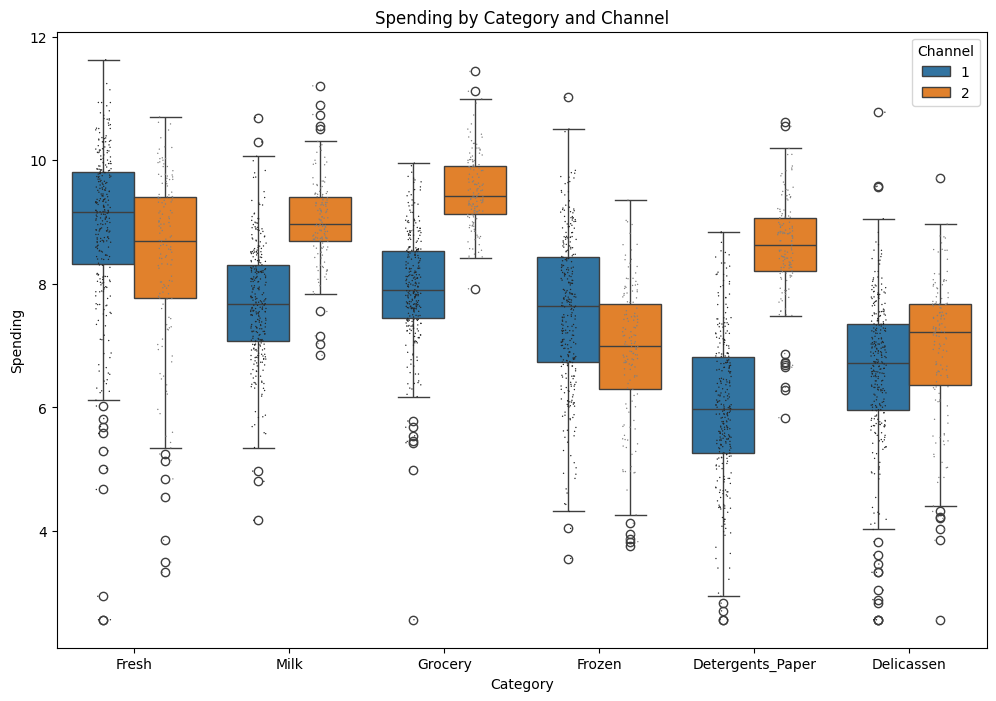

In [ ]:
# Plotting boxplot with hue
plt.figure(figsize=(12, 8))

# Boxplot with hue (differentiated by Channel)
sns.boxplot(x='Variable', y='Value', data=df_long, hue='Channel', palette = 'tab10', dodge=True)
# Stripplot overlay for each channel
sns.stripplot(x='Variable', y='Value', data=df_long, hue='Channel', palette='dark:.5', size=1, jitter=True, dodge=True, legend = False)
plt.title('Spending by Category and Channel')
plt.xlabel('Category')
plt.ylabel('Spending')
plt.legend(title='Channel')

# 2. Detecting Anomalies


## Anomaly Scores

Bemnchmark/naive approach: Calculate anomaly scores based on euclidean distance to closest instance.

In [ ]:
df = pd.read_parquet('/content/data_log_transformed_eps_10.parquet')
n = len(df)

In [ ]:

anomaly_score = np.full(n, np.inf)                                              # initializing anomaly array for each 440 instance with infinity
for i in range(n):
    for j in range(n):
        if i == j:
            continue
        distance = np.linalg.norm(df.iloc[i] - df.iloc[j])**2                   # squared Euclidean distance between the i-th and j-th row
        if distance < anomaly_score[i]:
            anomaly_score[i] = distance                                         # reducing distance from the intialized default anomaly score (infinity)

In [ ]:
df_anomaly_score = df.copy()
df_anomaly_score['Anomaly_Score'] = anomaly_score
df_anomaly_score = df_anomaly_score.sort_values(by='Anomaly_Score', ascending=False)
df_anomaly_score.iloc[:10]
#df_anomaly_score.to_csv(r'C:\Users\sk\Desktop\Anomaly')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly_Score
338,2.564949,5.837730,8.858084,9.655731,3.218876,6.327937,19.200908
75,9.923682,7.044905,2.564949,8.393216,2.564949,6.892642,13.094220
154,6.448889,4.174387,4.990433,4.442651,2.833213,2.890372,12.870776
95,2.564949,7.982758,8.742255,6.109248,5.451038,6.577861,11.329252
183,10.514801,10.691035,9.912447,10.506272,5.517453,10.777977,8.636633
142,10.519916,8.876545,9.019543,8.008033,3.401197,2.564949,8.582687
187,7.803027,8.988696,9.193092,8.744966,8.151622,2.564949,6.556690
128,5.010635,9.088963,8.251403,5.023881,6.977281,2.564949,6.389484
228,7.538495,6.375025,6.366470,6.866933,8.470521,5.361292,6.165231
65,4.553877,9.950800,10.732869,3.828641,10.095801,7.267525,5.947661


## 2.1 Robust Anomaly Models



Calculate anomaly score through a weighted sum of the distances to other instances, referred to as the softmean method.

Anomaly Scores for different Gamma : 0.05, 0.1, 1, 10

 we observe,

*   Same Anomalous instances visible for different Gamma --- However, distance between anomaly score differs.

In [ ]:
def calculate_anomaly_score(gamma):
    anomaly_score_sm = np.zeros(n)
    for i in range(n):
        exp_sum = 0
        for j in range(n):
            if i == j:
                continue
            distance = np.linalg.norm(df.iloc[i] - df.iloc[j])**2
            exp_sum += np.exp(- gamma * distance)
        anomaly_score_sm[i] = -(1/gamma) * np.log((1/(n-1)) * exp_sum)
    return anomaly_score_sm

gamma = [0.05, 0.1, 1, 10]
df_anomaly_score_sm = df.copy()

for i, g in enumerate(gamma, start=1):
  anomaly_score_gamma = calculate_anomaly_score(g)
  print(np.mean(anomaly_score_gamma), np.std(anomaly_score_gamma))
  print(max(anomaly_score_gamma), min(anomaly_score_gamma))

  # Dataframes for Anomaly Scores for Gamma
  df_anomaly_score_sm[f'Anomaly_Score_gamma_{i}'] = anomaly_score_gamma

df_anomaly_score_sm.to_csv('Anomaly_Scores_Gamma')

16.477863358108976 7.418815265266344
63.68899424517191 9.138187800985342
14.172782302121721 6.230147735030864
56.41257069163067 8.160215858895315
5.410966750936623 2.2677298652524467
25.23846406573403 3.3351631932308057
1.8979602411060876 1.7668979132634288
19.809358208128344 0.6787249596147116


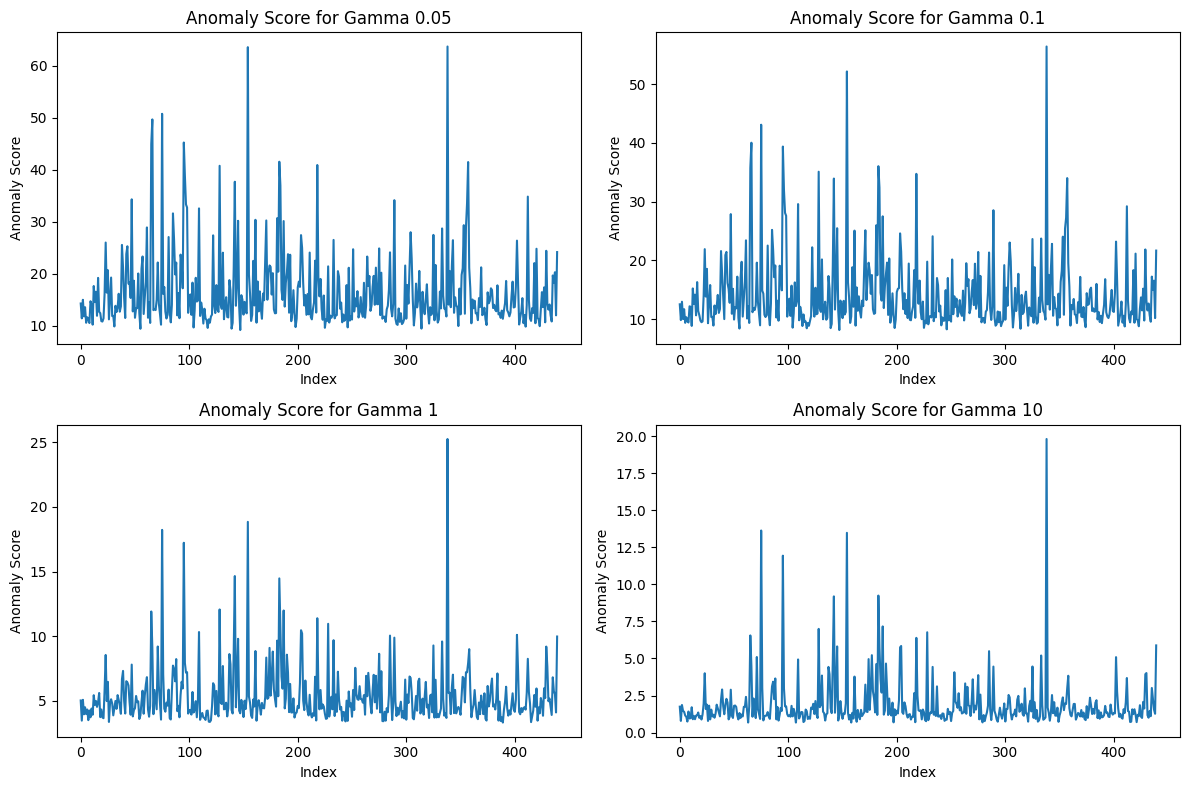

In [ ]:
# Plotting Anomly scores for different gamma
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, g in enumerate(gamma, start=1):
  ax = axes[i-1]
  sns.lineplot(data=df_anomaly_score_sm, y=f'Anomaly_Score_gamma_{i}', x=df.index, ax=ax)
  ax.set_title(f'Anomaly Score for Gamma {g}')
  ax.set_xlabel('Index')
  ax.set_ylabel('Anomaly Score')

# Adjust layout
plt.tight_layout()
plt.show()


Observe --- large difference in anomaly scores for some Gammas ..
And several anomalous instances beyond  and in the outliers ..

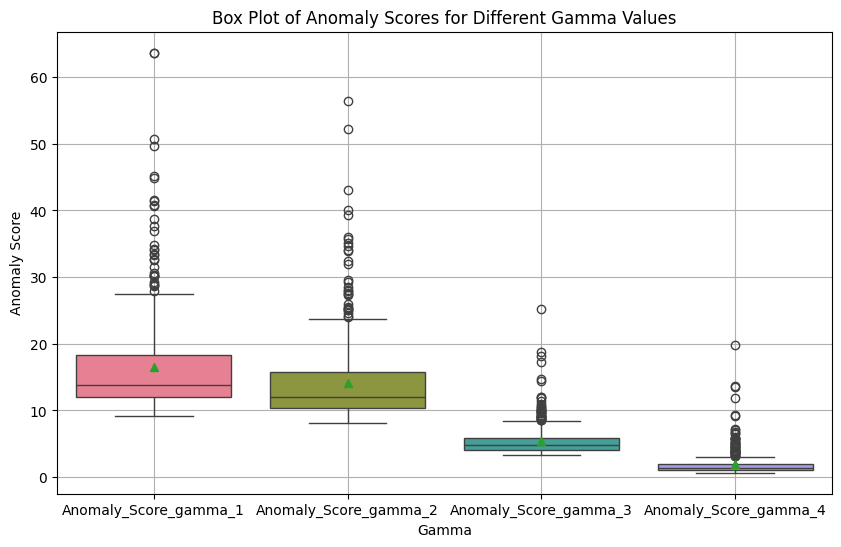

In [ ]:
# Box Plot Anomly scores for different
# Different Gamma : (1-4) --> 0.05, 0.1, 1, 10

# DataFrame to long format
df_long = df_anomaly_score_sm.melt(value_vars=[f'Anomaly_Score_gamma_{i}' for i in range(1, len(gamma) + 1)],
                                     var_name='Gamma', value_name='Anomaly_Score')

# Plotting the box plots
plt.figure(figsize=(10,6))
sns.boxplot(x='Gamma', y='Anomaly_Score', data=df_long, hue = 'Gamma', palette = "husl", showmeans=True)
plt.title('Anomaly Scores for Different Gamma Values')
plt.ylabel('Anomaly Score')
plt.grid()
plt.show()

In [ ]:
# Retreiving the Most Anomalous Instances for each Gamma Values - tbc
for i, g in enumerate(gamma, start=1):
  print ('__________________________________________')
  print ('__________________________________________')
  print(f' FOR ANOMALY SCORE GAMMA {i}')
  df_sorted = df_anomaly_score_sm.sort_values(by = f'Anomaly_Score_gamma_{i}', ascending=False)
  top = df_sorted.iloc[:10]
  print(top)


__________________________________________
__________________________________________
 FOR ANOMALY SCORE GAMMA 1
         Fresh       Milk    Grocery     Frozen  Detergents_Paper  Delicassen  \
338   2.564949   5.837730   8.858084   9.655731          3.218876    6.327937   
154   6.448889   4.174387   4.990433   4.442651          2.833213    2.890372   
75    9.923682   7.044905   2.564949   8.393216          2.564949    6.892642   
66    2.944439   7.342132   8.912877   5.220356          8.154213    3.610918   
95    2.564949   7.982758   8.742255   6.109248          5.451038    6.577861   
65    4.553877   9.950800  10.732869   3.828641         10.095801    7.267525   
183  10.514801  10.691035   9.912447  10.506272          5.517453   10.777977   
357   3.850148   7.158514  10.011534   4.990433          8.818334    4.787492   
218   3.332205   8.924523   9.630037   7.166266          8.477828    8.761237   
128   5.010635   9.088963   8.251403   5.023881          6.977281    2.564949

Observe --- varying difference in anomaly scores for some Gammas between top 10 anomalous instances.

Interstingly, several anomalous instances overlap across Gammas. But, distance betweeen instances differ evidently.

Index([338, 75, 154, 95, 183, 142, 187, 128, 228, 65], dtype='int64')
__________________________________________


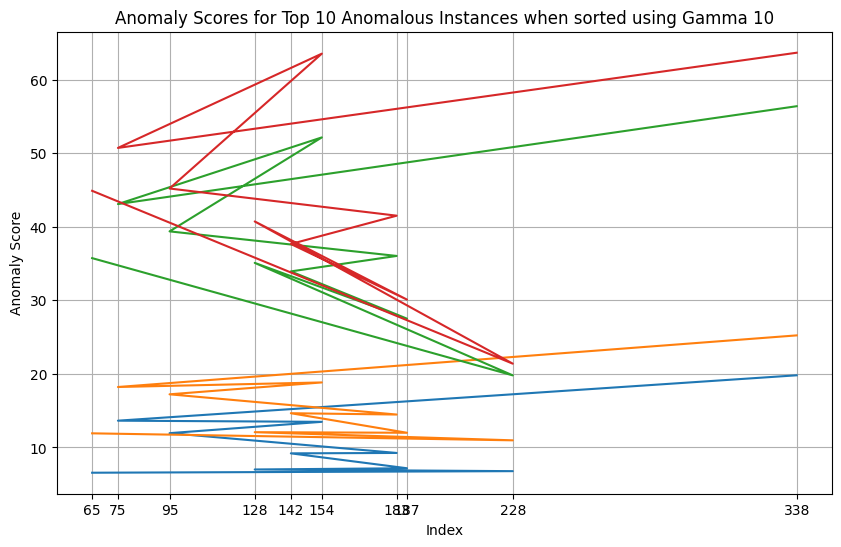

In [ ]:
# Line PLot for visualizing Different Gamma Values for Top 10 Anomalous Scores - by Gamma 10
# Different Gamma : 0.05, 0.1, 1, 10

top_idx_Gamma10 = df_anomaly_score_sm.sort_values(by = 'Anomaly_Score_gamma_4', ascending=False)
top_idx_Gamma10 = top_idx_Gamma10.iloc[:10]

print(top_idx_Gamma10.iloc[:10].index)
print ('__________________________________________')

plt.figure(figsize=(10, 6))

# Plot the data for the current anomaly score column
plt.plot(top_idx_Gamma10.index, top_idx_Gamma10['Anomaly_Score_gamma_4'], label=c)         ## Gamma 10 (blue)
plt.plot(top_idx_Gamma10.index, top_idx_Gamma10['Anomaly_Score_gamma_3'], label=c)         ## Gamma 1 (orange)
plt.plot(top_idx_Gamma10.index, top_idx_Gamma10['Anomaly_Score_gamma_2'], label=c)         ## Gamma 0.1 (green)
plt.plot(top_idx_Gamma10.index, top_idx_Gamma10['Anomaly_Score_gamma_1'], label=c)         ## Gamma 0.05 (red)

plt.xlabel('Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores for Top 10 Anomalous Instances when sorted using Gamma 10')
plt.xticks(top_idx_Gamma10.index)
plt.grid()
plt.show()

In [ ]:
top_idx_Gamma10

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly_Score_gamma_1,Anomaly_Score_gamma_2,Anomaly_Score_gamma_3,Anomaly_Score_gamma_4
338,2.564949,5.837730,8.858084,9.655731,3.218876,6.327937,63.688994,56.412571,25.238464,19.809358
75,9.923682,7.044905,2.564949,8.393216,2.564949,6.892642,50.739067,43.100336,18.216776,13.635763
154,6.448889,4.174387,4.990433,4.442651,2.833213,2.890372,63.560859,52.169549,18.837628,13.479226
95,2.564949,7.982758,8.742255,6.109248,5.451038,6.577861,45.218153,39.386764,17.222321,11.937702
183,10.514801,10.691035,9.912447,10.506272,5.517453,10.777977,41.521291,36.045089,14.470217,9.245083
142,10.519916,8.876545,9.019543,8.008033,3.401197,2.564949,37.670216,33.940727,14.650633,9.191137
187,7.803027,8.988696,9.193092,8.744966,8.151622,2.564949,30.105410,27.512192,11.991264,7.164810
128,5.010635,9.088963,8.251403,5.023881,6.977281,2.564949,40.737966,35.102803,12.070920,6.997934
228,7.538495,6.375025,6.366470,6.866933,8.470521,5.361292,21.389732,19.797075,10.962246,6.769365
65,4.553877,9.950800,10.732869,3.828641,10.095801,7.267525,44.905037,35.747192,11.914168,6.556111


## 2.2 Selecting a suitable Gamma parameter



We perform bootstrapping to select the gamma hyperparameter with consistent performace and good seperation of anamolous and non-anamolous instances.

### Part 1. Setting Bootstrapping : parameters - sampling repetitions, sample size and Gamma

In [ ]:
def calculate_anomaly_score(data, gamma=1):
    df = pd.DataFrame(data)
    n = len(df)
    anomaly_score_sm = np.zeros(n)
    for i in range(n):
        for j in range(n):
            if i == j:
                continue
            distance = np.linalg.norm(df.iloc[i] - df.iloc[j])**2
            anomaly_score_sm[i] += np.exp(-gamma*distance)
        anomaly_score_sm[i] = -(1/gamma)*np.log((1/(n-1))*anomaly_score_sm[i])
    return anomaly_score_sm

def bootstrap_gamma(n=len(df), n_boot_samples = 50, gamma = 1):
  # Dictionary to hold the anomaly scores for each original instance
  anomaly_scores_dict_full = {idx: [] for idx in df.index}

  # store anomaly score for bootstrap samples
  bootstrap_anomaly_scores_full = np.zeros((n_boot_samples, n))                 # sample size for bootstrap sampling

  # bootstrapping
  for i in range(n_boot_samples):
    print(f'Iteration {i}')
    bootstrap_sample = df.sample(n, replace=True)                              # sample size for bootstrap sampling
    bootstrap_idx = bootstrap_sample.index
    scores = calculate_anomaly_score(bootstrap_sample.values, gamma = 1)
    bootstrap_anomaly_scores_full[i, :] = scores
    for idx, score in zip(bootstrap_idx, scores):
      # for storing anomlay scores according to original index (df)
      anomaly_scores_dict_full[idx].append(score)

  mean_anomaly_scores_full = np.array([np.mean(anomaly_scores_dict_full[idx]) for idx in df.index])
  spread_anomaly_scores_full = np.array([np.std(anomaly_scores_dict_full[idx]) for idx in df.index])

  return pd.DataFrame({
     'mean_anomaly_score': mean_anomaly_scores_full,
     'spread_anomaly_score': spread_anomaly_scores_full
  })

#anomaly_bootstrap = bootstrap_gamma()

In [ ]:
def plot_anomalies(df_boot, gamma, sort, plot_type='errorbar'):
  if sort:
    df_boot = df_boot.sort_values(by='mean_anomaly_score', inplace=False)
  plt.figure(figsize=(8, 6))
  if plot_type == 'errorbar':
    plt.errorbar(list(range(440)),  df_boot['mean_anomaly_score'] , yerr = df_boot['spread_anomaly_score'] , fmt='o', color='b', ecolor='r', capsize=5)
  else:
    plt.hist(df_boot['mean_anomaly_score'], bins=30)
  plt.xlabel('Index')
  plt.ylabel('Mean Anomaly Score')
  plt.title(f'Mean Anomaly Scores with Error Bars for 50 samples of 440 size at Gamma {gamma}')
  plt.grid(True)
  plt.show()

### Gamma 0.1 - with 50 samples for n = 440

In [ ]:
anomaly_bootstrap_01 = pd.read_csv('Anomaly_bootstrap_gamma_01.csv')

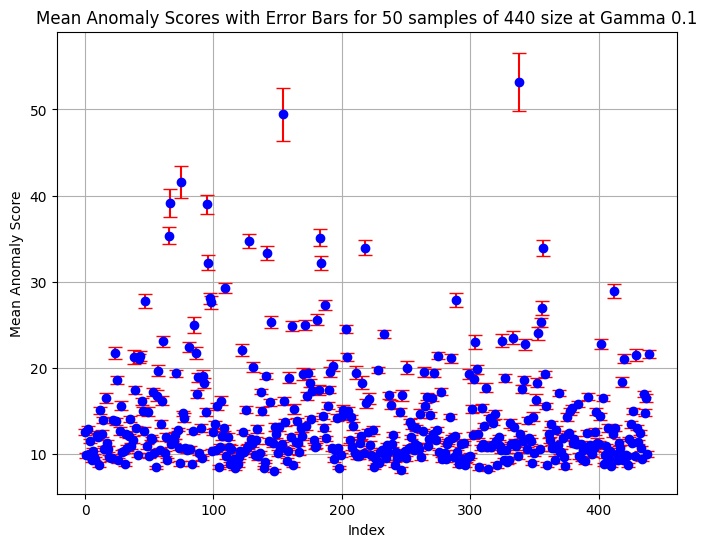

In [ ]:
plot_anomalies(anomaly_bootstrap_01, 0.1, False)

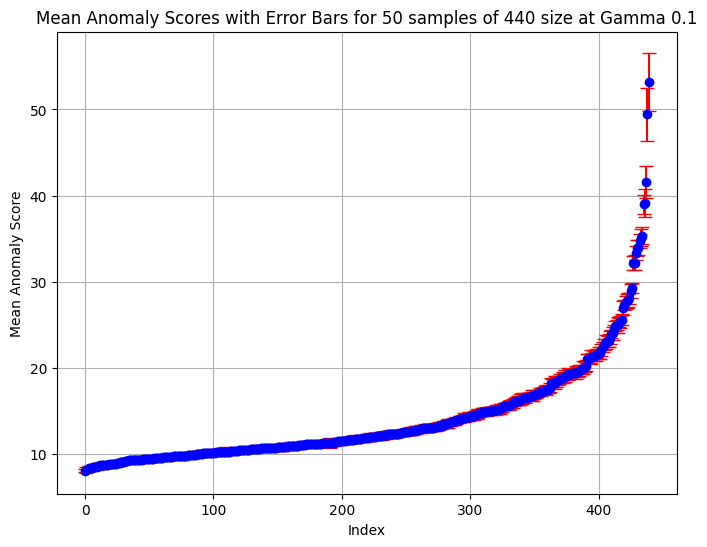

In [ ]:
plot_anomalies(anomaly_bootstrap_01, 0.1, True)

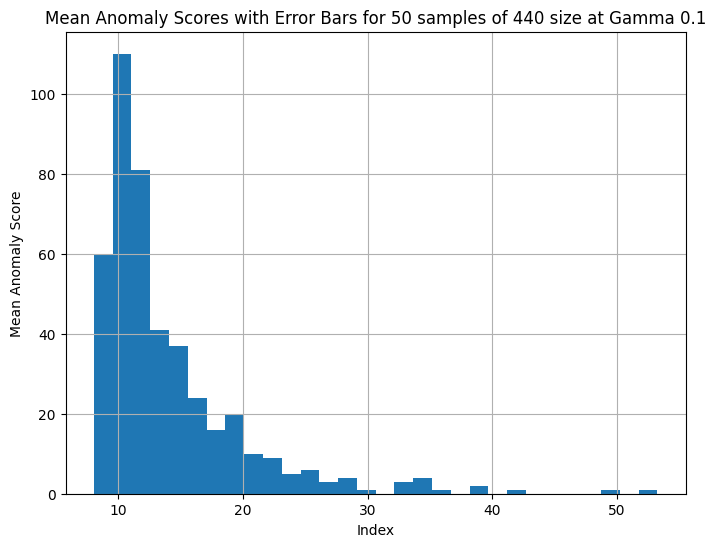

In [ ]:
plot_anomalies(anomaly_bootstrap_01, 0.1, False, 'hist')

### Gamma 0.5 - with 50 samples for n = 440

In [ ]:
anomaly_bootstrap_05 = pd.read_csv('Anomaly_bootstrap_gamma_05.csv')

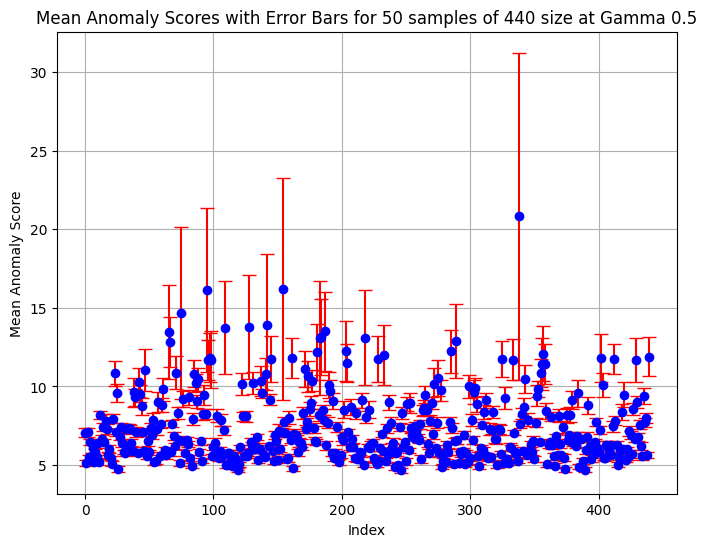

In [ ]:
plot_anomalies(anomaly_bootstrap_05, 0.5, False)

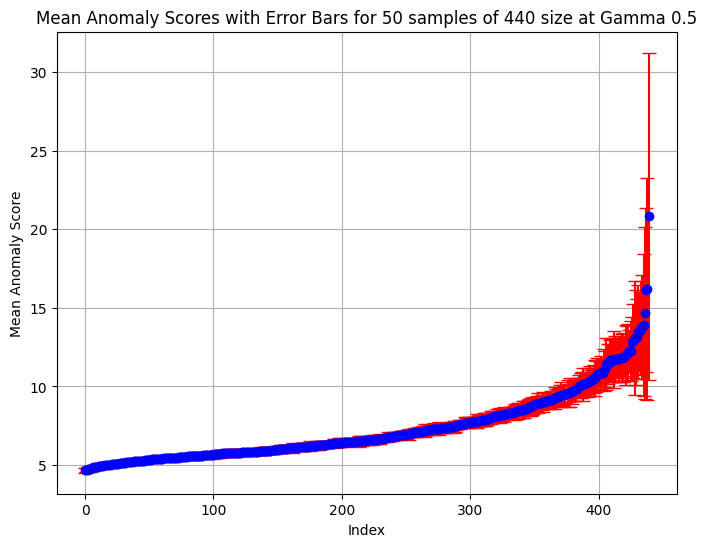

In [ ]:
plot_anomalies(anomaly_bootstrap_05, 0.5, True)

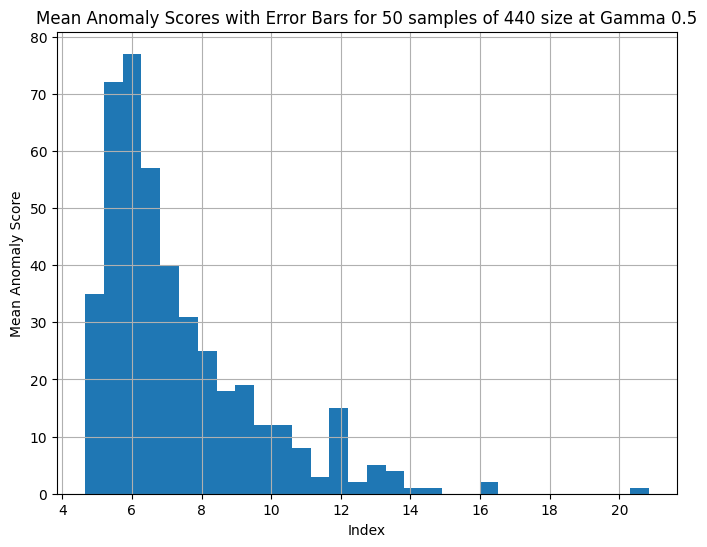

In [ ]:
plot_anomalies(anomaly_bootstrap_05, 0.5, False, 'hist')

### Gamma 1 - for 440 sample size

In [ ]:
anomaly_bootstrap_1 = pd.read_csv('Anomaly_bootstrap_gamma_1.csv')

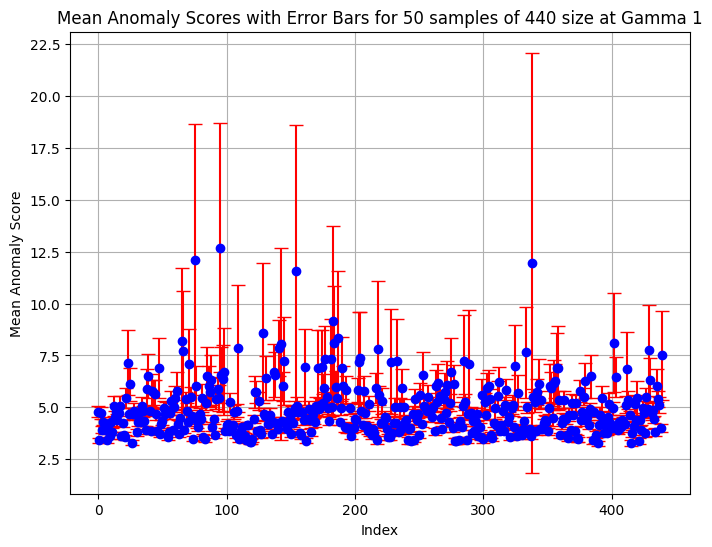

In [ ]:
plot_anomalies(anomaly_bootstrap_1, 1, False)

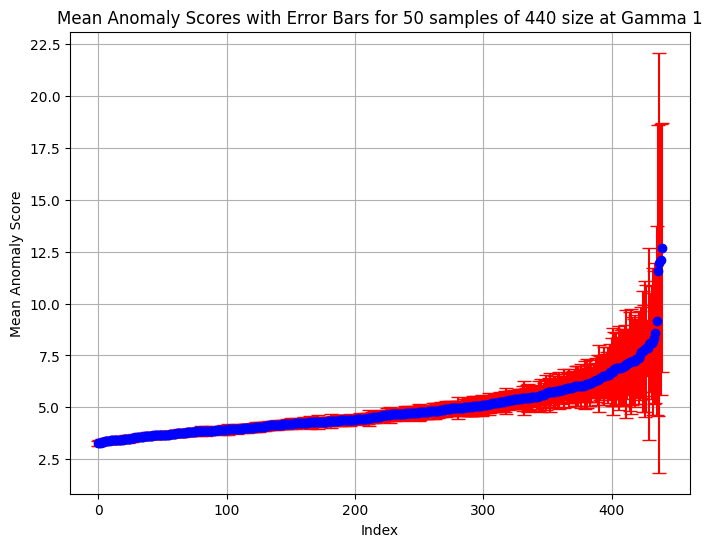

In [ ]:
plot_anomalies(anomaly_bootstrap_1, 1, True)

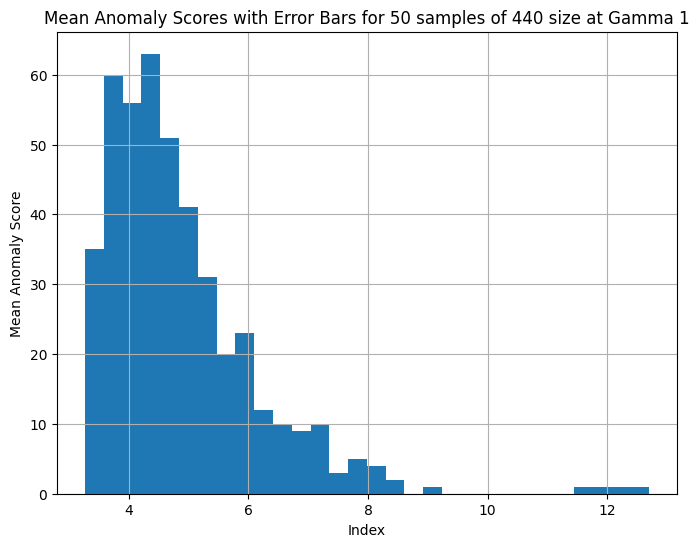

In [ ]:
plot_anomalies(anomaly_bootstrap_1, 1, False, 'hist')

###### GAMMA 10 - with 50 samples

In [ ]:
anomaly_bootstrap_10 = pd.read_csv('Anomaly_bootstrap_gamma_10.csv')

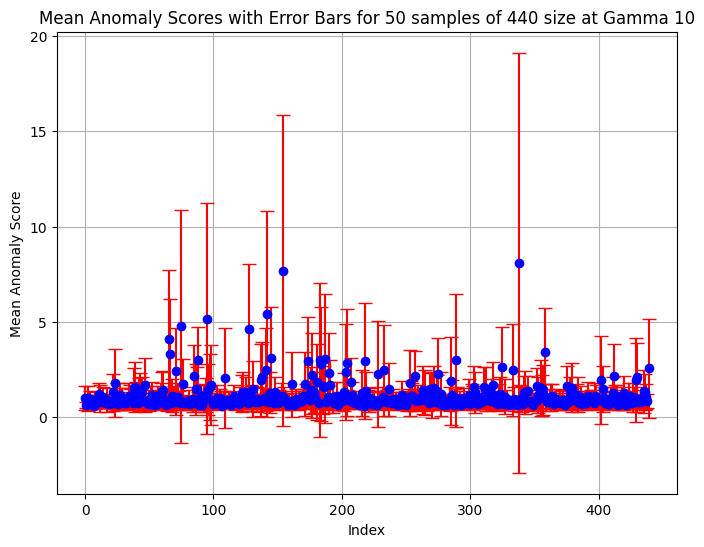

In [ ]:
plot_anomalies(anomaly_bootstrap_10, 10, False)

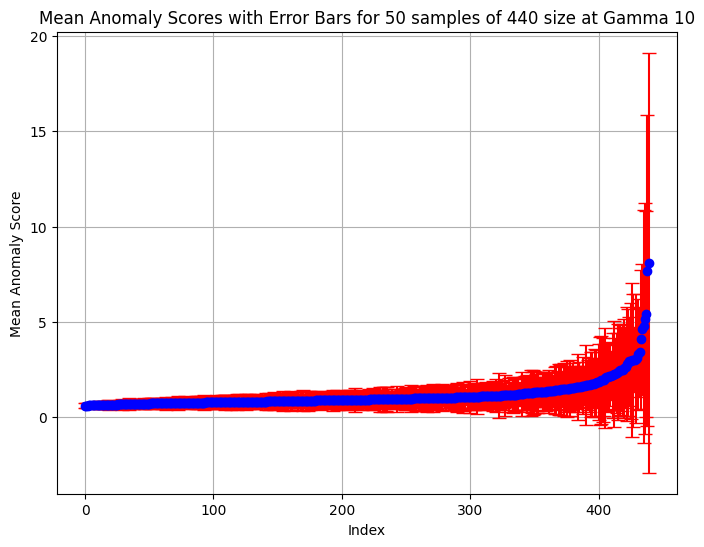

In [ ]:
plot_anomalies(anomaly_bootstrap_10, 10, True)

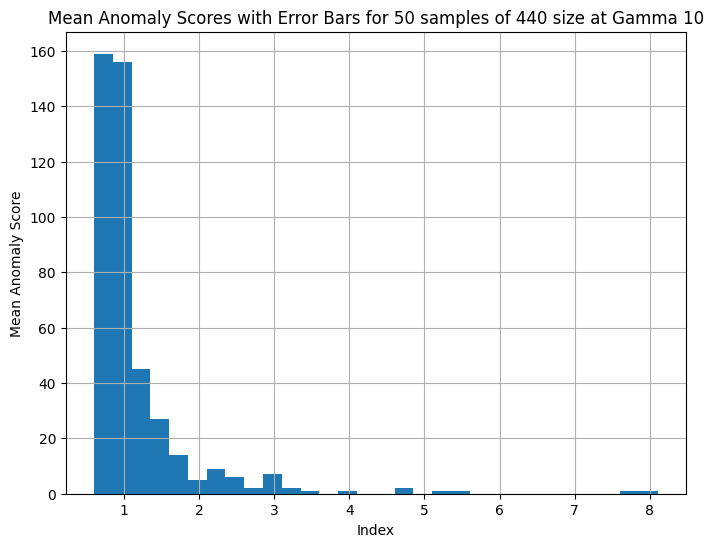

In [ ]:
plot_anomalies(anomaly_bootstrap_10, 10, False, 'hist')

**Conclusion**
The anomaly scores for gamma 0.1 are visually well-seperated and have low standard-distribution/spread over the bootstrap. As such, gamma = 0.1 seems to be a fitting choice for the parameter.

In the next subsection, we shall define some metrics to check our intuition and finalize our choice of gamma.

### Part 2. Deciding Gamma based on Evaluation metric

### **What makes a good Gamma ?**

We want that the chosen gamma seperates the anamolous and non-anamolous instances as widely/clearly as possible, while having low spread for the anomaly score of an instance in the bootstrap to ensure consistency and reporducibility.

To this end, a possible Evaluation metric is a profit function which takes the standard deviation of the means of the anomaly scores from the bootstrap to ensure that the anomalous and non-anomalous instances are widely seperated, and subtract the mean of the standard deviations of the anomaly scores from the bootstrap. We want to choose a gamma which would maximize this benefit function.

In [ ]:
def gamma_profit_function(mean, spread):
    #want to maximize difference between anomaly scores while keeping deviation of anomaly score low.
    return np.std(mean) - np.mean(spread)

In [ ]:
gamma_profit_function(anomaly_bootstrap_01.mean_anomaly_score, anomaly_bootstrap_01.spread_anomaly_score)

5.678192958997517

In [ ]:
gamma_profit_function(anomaly_bootstrap_05.mean_anomaly_score, anomaly_bootstrap_05.spread_anomaly_score)

1.7531035984400376

In [ ]:
gamma_profit_function(anomaly_bootstrap_1.mean_anomaly_score, anomaly_bootstrap_1.spread_anomaly_score)

0.7446911729396368

In [ ]:
gamma_profit_function(anomaly_bootstrap_10.mean_anomaly_score, anomaly_bootstrap_10.spread_anomaly_score)

0.010337442817832887

An alternative formulation of the metric would be to look at the difference between the average and median of the means. The Average should preferably be higher than the median to ensure that Anomalies are being given sufficiently distinguishably high anomaly scores.

In [ ]:
def gamma_profit_function_median(mean, spread):
    #want to maximize difference between anomaly scores while keeping deviation of anomaly score low.
    return (np.mean(mean) - np.median(mean))/np.mean(spread)

In [ ]:
gamma_profit_function_median(anomaly_bootstrap_01.mean_anomaly_score, anomaly_bootstrap_01.spread_anomaly_score)

5.205851259139367

In [ ]:
gamma_profit_function_median(anomaly_bootstrap_05.mean_anomaly_score, anomaly_bootstrap_05.spread_anomaly_score)

1.5528572688273907

In [ ]:
gamma_profit_function_median(anomaly_bootstrap_1.mean_anomaly_score, anomaly_bootstrap_1.spread_anomaly_score)

0.5570177976953103

In [ ]:
gamma_profit_function_median(anomaly_bootstrap_10.mean_anomaly_score, anomaly_bootstrap_10.spread_anomaly_score)

0.2963834780082909

 **Conclusion**

The plots, toghether with the metric-based evaluation, show that 0.1 is a good choice for gamma, as it minimizes the standard deviation of the anomaly scores to provide consistency, while also having good distance between anomalous and non-anomalous instances.

# 3. Getting Insights into Anomalies




Settings ----


*   Section 1 - Preprocessing : Adding offset of 10 for log- transformation to numerical data
*   Section 2 - Soft Margin for computing Anomaly Scores with Gamma = 0.1



In [ ]:
df = pd.read_parquet('/content/data_log_transformed_eps_10.parquet')
n = len(df)

In [ ]:
gamma = 0.1
anomaly_score_final = np.zeros(n)
for i in range(n):
  exp_sum = 0
  for j in range(n):
    if i == j:
      continue
    distance = np.linalg.norm(df.iloc[i] - df.iloc[j])**2
    exp_sum += np.exp(- gamma * distance)
    anomaly_score_final[i] = -(1/gamma) * np.log((1/(n-1)) * exp_sum)

In [ ]:
df_anomaly_score_final = df.copy()
# Dataframes for Anomaly Scores for Gamma
df_anomaly_score_final['Anomaly_Score'] = anomaly_score_final

df_anomaly_score_final.to_csv('Anomaly_Scores_final')
df_anomaly_score_final = df_anomaly_score_final.sort_values(by='Anomaly_Score', ascending=False)
df_anomaly_score_final.iloc[:10]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly_Score
338,2.564949,5.837730,8.858084,9.655731,3.218876,6.327937,56.412571
154,6.448889,4.174387,4.990433,4.442651,2.833213,2.890372,52.169549
75,9.923682,7.044905,2.564949,8.393216,2.564949,6.892642,43.100336
66,2.944439,7.342132,8.912877,5.220356,8.154213,3.610918,40.038439
95,2.564949,7.982758,8.742255,6.109248,5.451038,6.577861,39.386764
183,10.514801,10.691035,9.912447,10.506272,5.517453,10.777977,36.045089
65,4.553877,9.950800,10.732869,3.828641,10.095801,7.267525,35.747192
128,5.010635,9.088963,8.251403,5.023881,6.977281,2.564949,35.102803
218,3.332205,8.924523,9.630037,7.166266,8.477828,8.761237,34.741580
357,3.850148,7.158514,10.011534,4.990433,8.818334,4.787492,34.017930


Indices for top anomaly scores Index([338, 154, 75, 66, 95, 183, 65, 128, 218, 357], dtype='int64')


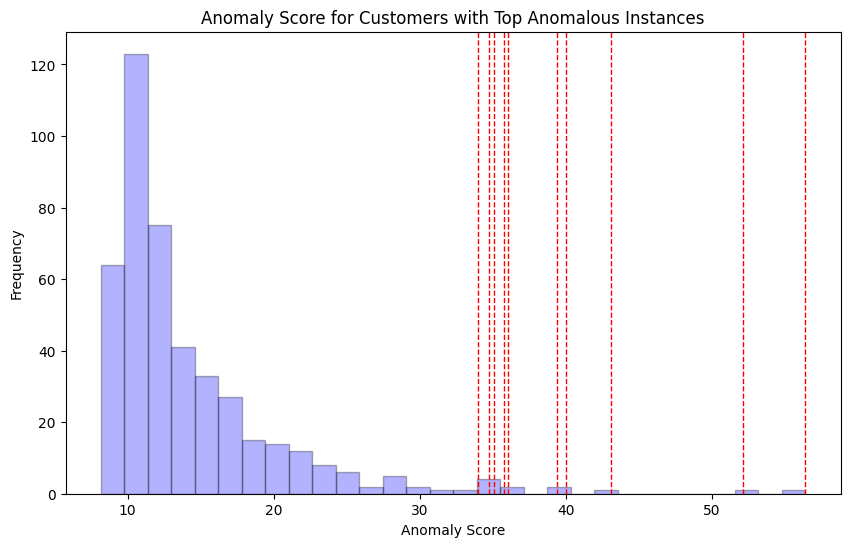

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_anomaly_score_final['Anomaly_Score'], bins =30, alpha=0.3, color='blue', edgecolor='black')
indices_mark = df_anomaly_score_final.iloc[:10].index
values_mark = df_anomaly_score_final.loc[indices_mark, 'Anomaly_Score']
for v in values_mark:
  plt.axvline(x=v, color='red', linestyle='--', linewidth=1)

plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score for Customers with Top Anomalous Instances')

print(f'Indices for top anomaly scores {indices_mark}' )

## 3.1 Relation Between Anomalies and Meta-Data



#### Does the Anomalous instances vary wrt Meta - Data : Channel ?



Top Anomalous Indices -

-  Direct Customers (2) : **218**, **357**, 96, 109, **65**, 334, 47, 145, 171, 353
-  Indirect Customer (1) : **338**, **154**, **66**, **75**, **95**, **128**, **183**, 412, 142, 184
- Full Dataset      : 338, 154, 75, 66, 95, 183, 65,128, 218, 357


Highest Anomaly Score -

-  Direct Customers (2) : 30.15 for subset 2 (142 instances)
-  Indirect Customer (1) : 53.93 for subset 1 (298 instances)
- Full Dataset      :  56.41 for full data set

we observe,

1. Interstingly, calculating anomaly scores on subset of data revealed also Different customers as Top 10 Anomalous. This shows that anomaly scores infact do Depend highly on whether the customer is a direct or indirect one.

2. This is also consistent from Section 1 additonal analysis, where we saw that across channels customers spend differently on the 6 categories.

3. Anomaly scores dropped considerably for Channel 2 - Direct Customers. This may reflect that the Overall Anomaly Scores for Full Dataset follows similar trends more with Indirect Customer than that of Direct Customer (as highlighted). This may also be due to higher sample size of Indirect Cusotmer (298) than Direct Customer (142)

4. Subsetting on this Meta-data may help us with new insights on customer spending behaviour that may vary between Direct and Indirect.

In [ ]:
# Log transformation with Channel Meta-data
df_trans = df_main
columns_to_transform = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Apply logarithmic transformation and addition to selected columns in df2_trans
df_trans[columns_to_transform] = np.log(df_main[columns_to_transform] + 10)          # Section 1 _ offset = 10

df_trans.head()
#sns.scatterplot(data=df2_trans[columns_to_transform], color='skyblue', alpha=0.6)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,9.447702,9.176370,8.932080,5.411646,7.895063,7.206377
1,2,3,8.863191,9.192176,9.167224,7.479864,8.102586,7.487734
2,2,3,8.758255,9.084550,8.948196,7.789455,8.167919,8.968778
3,1,3,9.493638,7.095064,8.350194,8.766238,6.248043,7.494430
4,2,3,10.026811,8.597851,8.882947,8.275122,7.488294,8.555452


In [ ]:
# Anomaly scores according to Subsets
def calculate_anomaly_score(data):
    gamma = 0.1                                                                 # Section 2 _ Gamma = 1 or .1
    n = len(data)
    anomaly_score_part = np.zeros(n)
    for i in range(n):
        exp_sum = 0
        for j in range(n):
            if i == j:
                continue
            distance = np.linalg.norm(data.iloc[i] - data.iloc[j])**2
            exp_sum += np.exp(- gamma * distance)
        anomaly_score_part[i] = -(1/gamma) * np.log((1/(n-1)) * exp_sum)
    return anomaly_score_part

In [ ]:
# Subsetting data wrt Channel - 1 : Indirect , 2 : Direct
# Computing Anomlay Scores

df_trans_1 = df_trans[df_trans['Channel'] == 1]                                 # Indirect Customers
df_trans_2 = df_trans[df_trans['Channel'] == 2]                                 # Direct Customers

anomaly_score_1 = calculate_anomaly_score(df_trans_1)
anomaly_score_2 = calculate_anomaly_score(df_trans_2)

df_anomaly_score_1 = df_trans_1.copy()
df_anomaly_score_1['Anomaly_Score'] = anomaly_score_1
df_anomaly_score_1 = df_anomaly_score_1.sort_values(by='Anomaly_Score', ascending=False)
df_anomaly_score_1.to_csv('Anomaly_Channel_1')

df_anomaly_score_2 = df_trans_2.copy()
df_anomaly_score_2['Anomaly_Score'] = anomaly_score_2
df_anomaly_score_2 = df_anomaly_score_2.sort_values(by='Anomaly_Score', ascending=False)

df_anomaly_score_2.to_csv('Anomaly_Channel_2')

Lets look at the distribution of Anomaly Scores - for full and the two subset of datas, with Anomaly Scores for the top 10 instances marked.

Indices for top anomaly scores Index([338, 154, 66, 75, 95, 128, 183, 412, 142, 184], dtype='int64')


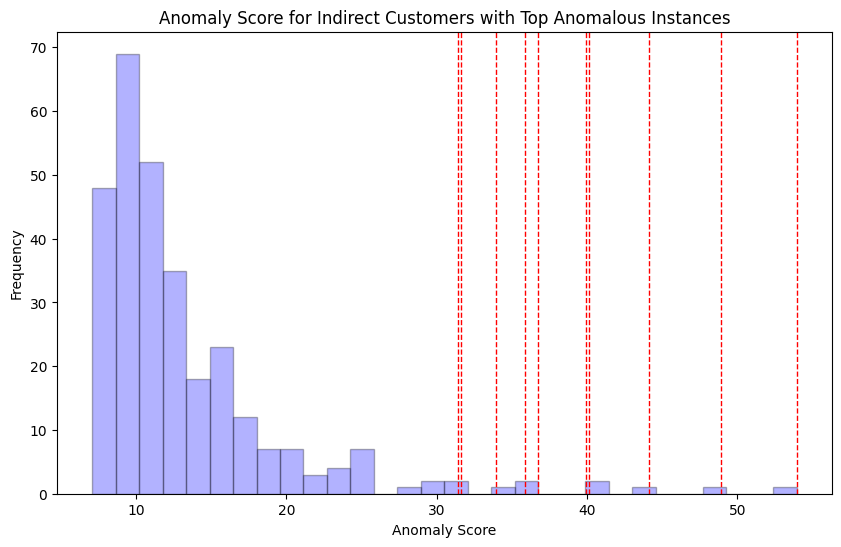

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_anomaly_score_1['Anomaly_Score'], bins =30, alpha=0.3, color='blue', edgecolor='black')
indices_mark_1 = df_anomaly_score_1.iloc[:10].index
values_mark_1 = df_anomaly_score_1.loc[indices_mark_1, 'Anomaly_Score']
for v in values_mark_1:
  plt.axvline(x=v, color='red', linestyle='--', linewidth=1)

plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score for Indirect Customers with Top Anomalous Instances')

print(f'Indices for top anomaly scores {indices_mark_1}' )

In [ ]:
df_anomaly_score_1.iloc[:10]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly_Score
338,1,2,2.564949,5.837730,8.858084,9.655731,3.218876,6.327937,53.936299
154,1,3,6.448889,4.174387,4.990433,4.442651,2.833213,2.890372,48.917695
66,1,3,2.944439,7.342132,8.912877,5.220356,8.154213,3.610918,44.116879
75,1,3,9.923682,7.044905,2.564949,8.393216,2.564949,6.892642,40.094431
95,1,3,2.564949,7.982758,8.742255,6.109248,5.451038,6.577861,39.920882
128,1,3,5.010635,9.088963,8.251403,5.023881,6.977281,2.564949,36.707185
183,1,3,10.514801,10.691035,9.912447,10.506272,5.517453,10.777977,35.844042
412,1,3,4.672829,8.192847,9.426258,4.682131,7.999679,4.276666,33.942439
142,1,3,10.519916,8.876545,9.019543,8.008033,3.401197,2.564949,31.610627
184,1,3,5.820083,6.833032,8.459564,4.430817,5.840642,3.044522,31.401842


Indices for top anomaly scores Index([218, 357, 96, 109, 65, 334, 47, 145, 171, 353], dtype='int64')


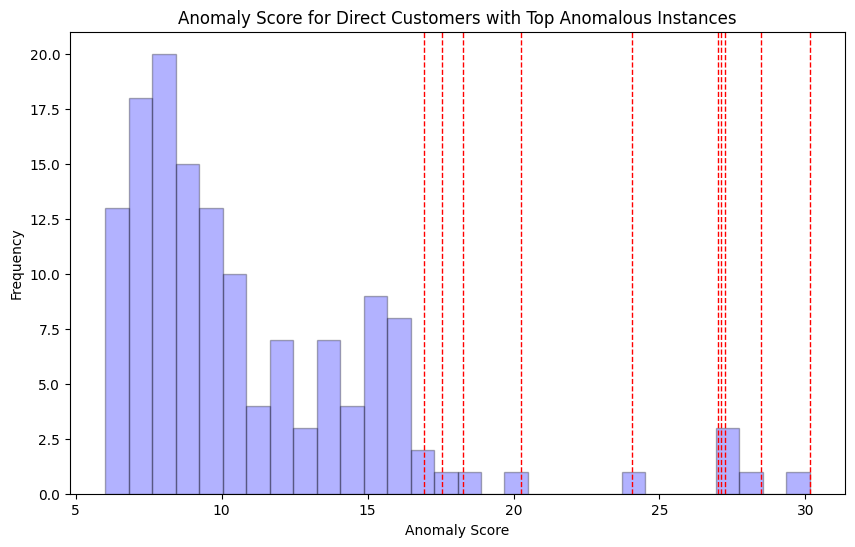

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_anomaly_score_2['Anomaly_Score'], bins =30, alpha=0.3, color='blue', edgecolor='black')
indices_mark_2 = df_anomaly_score_2.iloc[:10].index
values_mark_2 = df_anomaly_score_2.loc[indices_mark_2, 'Anomaly_Score']
for v in values_mark_2:
  plt.axvline(x=v, color='red', linestyle='--', linewidth=1)

plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score for Direct Customers with Top Anomalous Instances')

print(f'Indices for top anomaly scores {indices_mark_2}' )

In [ ]:
df_anomaly_score_2.iloc[:10]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly_Score
218,2,1,3.332205,8.924523,9.630037,7.166266,8.477828,8.761237,30.150663
357,2,3,3.850148,7.158514,10.011534,4.990433,8.818334,4.787492,28.482094
96,2,3,3.496508,7.873217,9.003070,5.043425,8.264621,5.424950,27.258782
109,2,3,7.255591,9.725497,10.274913,6.526495,6.740519,2.564949,27.098675
65,2,3,4.553877,9.950800,10.732869,3.828641,10.095801,7.267525,26.995398
334,2,2,9.731097,6.843750,7.920447,9.356084,5.834811,8.159375,24.066582
47,2,3,10.702705,10.901708,10.925597,8.960853,10.093322,8.775704,20.244858
145,2,3,10.001023,9.035272,10.457430,3.951244,9.441531,8.398410,18.283706
171,2,3,5.347108,10.160917,9.894749,6.493754,9.080573,8.741935,17.547870
353,2,3,4.844187,8.744169,9.962369,5.472271,9.070158,7.021976,16.922841


#### Does the Anomalous instances vary wrt Meta - Data : Region ?



REGION

**Lisbon	77  coded as 1**

**Oporto	47 coded as 2**

**Other Region	316 coded as 3**

Top Anomalous Indices -

- Lisbon (1) : **218**, 203, 233, 264, 204, 251, 211, 272, 216, 228
- Oporto (2) : **338**, 325, 304, 333, 299, 305, 327, 303, 312, 309
-  Other region (3) : **154**, **75**, **95**, **66**, **183**, **65**, **128**, 142, **357**, 184
- Full Dataset      : 338, 154, 75, 66, 95, 183, 65, 128, 218, 357

Highest Anomaly Score -

-  Lisbon (1) : 36.81 for subset 1 (77 instances)
-  Oporto (2) : 56.16 for subset 2 (47 instances)
- Other Regions (3) : 51.32 for subset 3 (316 instances)
- Full Dataset      :  56.41 for full data set

we observe,

1. Interstingly, most of the top Anomalous Instances from full data set are from Other regions in Portugal. Therefore, this region seems to influence the anomaly scores overall. Also, given this data set is mostly comprising customers from Other regions (316 instances).
2. Subsequently, for the other two much smaller subsets, several new anomaly instances are found for those regions.
3. Subsetting on this Meta Data may skew the anomaly score alot, and therefore may not be represenative of the overall general trend. (Because of the sample size difference for each of the region)

In [ ]:
# Calculating respective Anomaly scores for each subset Region
df_trans_1R = df_trans[df_trans['Region'] == 1]                                 # Lisbon
df_trans_2R = df_trans[df_trans['Region'] == 2]                                 # Porto
df_trans_3R = df_trans[df_trans['Region'] == 3]                                 # Others

anomaly_score_1R = calculate_anomaly_score(df_trans_1R)
anomaly_score_2R = calculate_anomaly_score(df_trans_2R)
anomaly_score_3R = calculate_anomaly_score(df_trans_3R)

df_anomaly_score_1R = df_trans_1R.copy()
df_anomaly_score_1R['Anomaly_Score'] = anomaly_score_1R
df_anomaly_score_1R = df_anomaly_score_1R.sort_values(by='Anomaly_Score', ascending=False)
df_anomaly_score_1R.to_csv('Anomaly_Region_1R')

df_anomaly_score_2R = df_trans_2R.copy()
df_anomaly_score_2R['Anomaly_Score'] = anomaly_score_2R
df_anomaly_score_2R = df_anomaly_score_2R.sort_values(by='Anomaly_Score', ascending=False)
df_anomaly_score_2R.to_csv('Anomaly_Region_2R')

df_anomaly_score_3R = df_trans_3R.copy()
df_anomaly_score_3R['Anomaly_Score'] = anomaly_score_3R
df_anomaly_score_3R = df_anomaly_score_3R.sort_values(by='Anomaly_Score', ascending=False)
df_anomaly_score_3R.to_csv('Anomaly_Region_3R')

Lets look at the distribution of Anomaly Scores for the three subset of datas, with Anomaly Scores for the top 10 instances marked.

Indices for top anomaly scores Index([218, 203, 233, 264, 204, 251, 211, 272, 216, 228], dtype='int64')


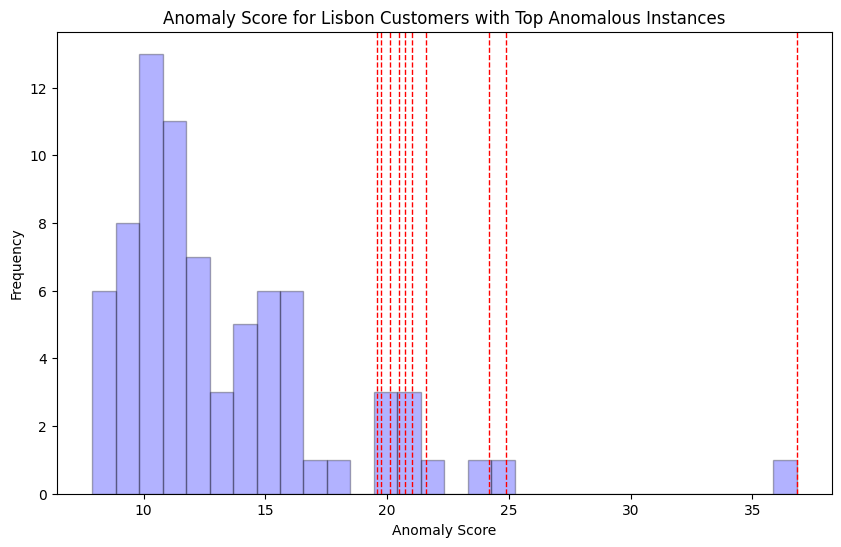

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_anomaly_score_1R['Anomaly_Score'], bins =30, alpha=0.3, color='blue', edgecolor='black')
indices_mark_1R = df_anomaly_score_1R.iloc[:10].index
values_mark_1R = df_anomaly_score_1R.loc[indices_mark_1R, 'Anomaly_Score']
for v in values_mark_1R:
  plt.axvline(x=v, color='red', linestyle='--', linewidth=1)

plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score for Lisbon Customers with Top Anomalous Instances')

print(f'Indices for top anomaly scores {indices_mark_1R}' )

In [ ]:
df_anomaly_score_1R.iloc[:10]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly_Score
218,2,1,3.332205,8.924523,9.630037,7.166266,8.477828,8.761237,36.816828
203,1,1,6.385194,6.543912,7.707962,6.171701,6.871091,3.332205,24.865235
233,1,1,6.881411,8.515992,8.109526,6.853299,6.037871,2.833213,24.190738
264,2,1,6.987490,9.178747,9.645688,4.262680,8.697847,7.150701,21.586884
204,1,1,7.583756,6.803505,8.563313,7.239215,2.708050,7.198931,21.027941
251,2,1,8.723231,10.049448,10.422162,8.818186,9.831132,8.543056,20.721689
211,2,1,9.403355,10.251888,10.589207,8.465057,9.874059,7.965546,20.502034
272,1,1,6.261492,9.027979,8.836229,6.289716,4.634729,6.956545,20.134515
216,2,1,7.840706,9.717700,10.504958,5.241747,9.496872,6.527958,19.766275
228,1,1,7.538495,6.375025,6.366470,6.866933,8.470521,5.361292,19.575755


Indices for top anomaly scores Index([338, 325, 304, 333, 299, 305, 327, 303, 312, 309], dtype='int64')


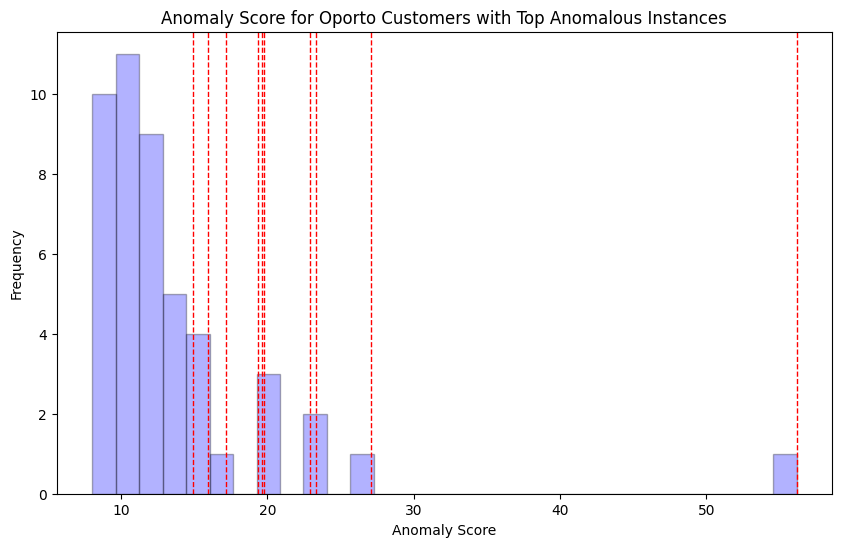

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_anomaly_score_2R['Anomaly_Score'], bins =30, alpha=0.3, color='blue', edgecolor='black')
indices_mark_2R = df_anomaly_score_2R.iloc[:10].index
values_mark_2R = df_anomaly_score_2R.loc[indices_mark_2R, 'Anomaly_Score']
for v in values_mark_2R:
  plt.axvline(x=v, color='red', linestyle='--', linewidth=1)

plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score for Oporto Customers with Top Anomalous Instances')

print(f'Indices for top anomaly scores {indices_mark_2R}' )

In [ ]:
df_anomaly_score_2R.iloc[:10]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly_Score
338,1,2,2.564949,5.837730,8.858084,9.655731,3.218876,6.327937,56.165363
325,1,2,10.395956,9.728777,9.520469,11.016644,7.156177,8.633909,27.103389
304,2,2,5.141664,8.918650,10.117913,6.440947,9.375261,7.791523,23.349407
333,2,2,9.056606,8.515191,11.117034,4.948760,10.548284,7.110696,22.923303
299,1,2,6.118097,6.790097,7.635304,5.613128,5.703782,5.594711,19.765085
305,2,2,5.533389,9.468774,9.089528,6.695799,8.273592,5.398163,19.661529
327,1,2,6.313548,6.812345,7.422971,6.049733,4.584967,6.276643,19.380588
303,2,2,7.866722,8.215547,9.535246,6.218600,9.218209,4.234107,17.204693
312,2,2,7.671827,8.228711,9.861728,7.157735,9.748587,5.023881,15.949748
309,2,2,6.833032,9.936197,9.516132,7.296413,8.832879,6.704414,14.907179


Indices for top anomaly scores Index([154, 75, 95, 66, 183, 65, 128, 142, 357, 184], dtype='int64')


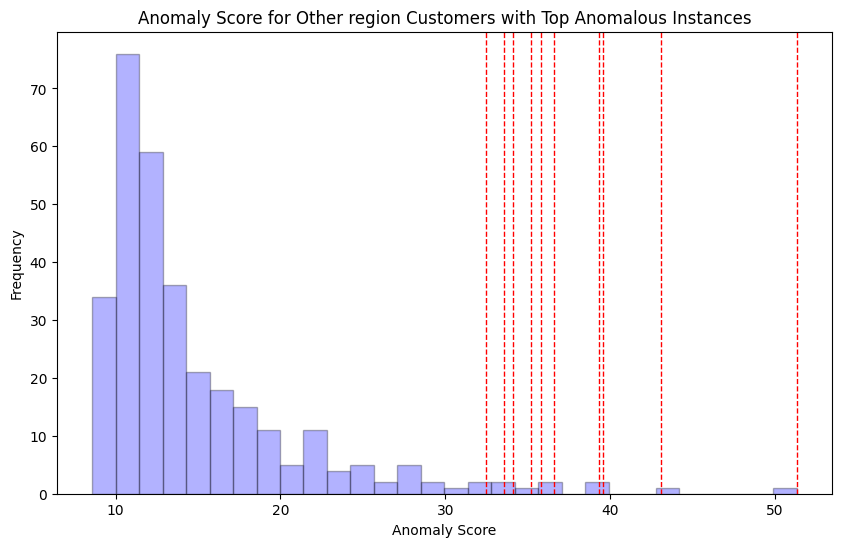

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_anomaly_score_3R['Anomaly_Score'], bins =30, alpha=0.3, color='blue', edgecolor='black')
indices_mark_3R = df_anomaly_score_3R.iloc[:10].index
values_mark_3R = df_anomaly_score_3R.loc[indices_mark_3R, 'Anomaly_Score']
for v in values_mark_3R:
  plt.axvline(x=v, color='red', linestyle='--', linewidth=1)

plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score for Other region Customers with Top Anomalous Instances')

print(f'Indices for top anomaly scores {indices_mark_3R}' )

In [ ]:
df_anomaly_score_3R.iloc[:10]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly_Score
154,1,3,6.448889,4.174387,4.990433,4.442651,2.833213,2.890372,51.325391
75,1,3,9.923682,7.044905,2.564949,8.393216,2.564949,6.892642,43.074052
95,1,3,2.564949,7.982758,8.742255,6.109248,5.451038,6.577861,39.571078
66,1,3,2.944439,7.342132,8.912877,5.220356,8.154213,3.610918,39.329091
183,1,3,10.514801,10.691035,9.912447,10.506272,5.517453,10.777977,36.583384
65,2,3,4.553877,9.950800,10.732869,3.828641,10.095801,7.267525,35.792546
128,1,3,5.010635,9.088963,8.251403,5.023881,6.977281,2.564949,35.201712
142,1,3,10.519916,8.876545,9.019543,8.008033,3.401197,2.564949,34.098775
357,2,3,3.850148,7.158514,10.011534,4.990433,8.818334,4.787492,33.578385
184,1,3,5.820083,6.833032,8.459564,4.430817,5.840642,3.044522,32.498996


## 3.2 Indentifying Input Features that Drive Anomaly



Using Layer-wise Relevance Propagation method (Montavon et al., 2019) :
- to understand how input features contribute to the Anomaly score for an instance.






In [ ]:
df = pd.read_parquet('/content/data_log_transformed_eps_10.parquet')
n = len(df)

In [ ]:
# Computing R for contribution of data point j to the anomaly score of instance i

def instance_contribution(data, gamma=0.1):
    df = pd.DataFrame(data)
    n = len(df)
    anomaly_score_sm = np.zeros(n)
    r = np.zeros((n, n))
    for i in range(n):
        exp_sum = 0
        for j in range(n):
            if i == j:
                continue
            distance = np.linalg.norm(df.iloc[i] - df.iloc[j])**2
            exp_value = np.exp(-gamma*distance)
            exp_sum += exp_value
            r[i][j] = exp_value
        anomaly_score_sm[i] = -(1/gamma)*np.log((1/(n-1))*exp_sum)
        for j in range(n):
            # contribution of data point j to anomaly score of instance i
            r[i][j] = (r[i][j]/exp_sum)*anomaly_score_sm[i]
    return anomaly_score_sm, r

Anomaly_score, R_anomaly = instance_contribution(df)

In [ ]:
# Computing R for contribution of input feature j to the anomaly score of instance i

def feature_contributions(data, r):
    r_features = np.zeros((len(data.columns), len(data)))
    for i in range(len(data.columns)):
        for j in range(len(data)):
            for k in range(len(data)):
                if k == j:
                    continue
                r_features[i][j] += (((data.iloc[k, i] - data.iloc[j, i])**2) / np.linalg.norm(df.iloc[k] - df.iloc[j])**2) * r[j][k]        # j contributes to instance i with R_j propogating
    return r_features

R_feature = feature_contributions(df,R_anomaly)

In [ ]:
df['Anomaly_Scores'] = Anomaly_score
indx = [338, 154, 66, 75, 95, 128, 183, 412, 142]
df.loc[indx]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly_Scores
338,2.564949,5.837730,8.858084,9.655731,3.218876,6.327937,56.412571
154,6.448889,4.174387,4.990433,4.442651,2.833213,2.890372,52.169549
66,2.944439,7.342132,8.912877,5.220356,8.154213,3.610918,40.038439
75,9.923682,7.044905,2.564949,8.393216,2.564949,6.892642,43.100336
95,2.564949,7.982758,8.742255,6.109248,5.451038,6.577861,39.386764
128,5.010635,9.088963,8.251403,5.023881,6.977281,2.564949,35.102803
183,10.514801,10.691035,9.912447,10.506272,5.517453,10.777977,36.045089
412,4.672829,8.192847,9.426258,4.682131,7.999679,4.276666,29.220143
142,10.519916,8.876545,9.019543,8.008033,3.401197,2.564949,33.940727


In [ ]:
R = pd.DataFrame(R_feature.T)
R.loc[indx]

,0,1,2,3,4,5
338,29.485070,4.529298,2.130403,10.513941,8.336905,1.416954
154,5.396845,9.010229,7.602488,10.874156,7.685597,11.600233
66,18.047837,3.503522,2.141368,2.129333,3.326700,10.889680
75,1.457854,1.880539,29.035958,1.691701,7.810054,1.224231
95,24.699626,1.402416,1.364338,2.039177,7.271388,2.609820
128,9.469591,3.571826,1.930515,3.789911,3.459209,12.881751
183,1.876089,6.547149,2.469367,6.747506,4.913448,13.491530
412,10.890660,1.935286,1.408106,4.988525,2.789963,7.207603


### How different features contribute to Anomaly Scores ?

we observe,

For e.g.,

338 - Anomaly score is primalrily because of first feature : Spending on Fresh Categories (extremely low)

154 - All features contribute to the Anomaly score (very high for Fresh and low on others)

1. In general, this helps us understand the reason behind anomaly scores -- identfiy reasons or feature-wise spending.

2. Some customers have a high bias towards spending on some categories. While, others in general display overall 'edge' behaviours -- spending too high or too low.
3. Most importantly, we can identify if anomalous behaviour ( high or low spending) is driven by a particular category.

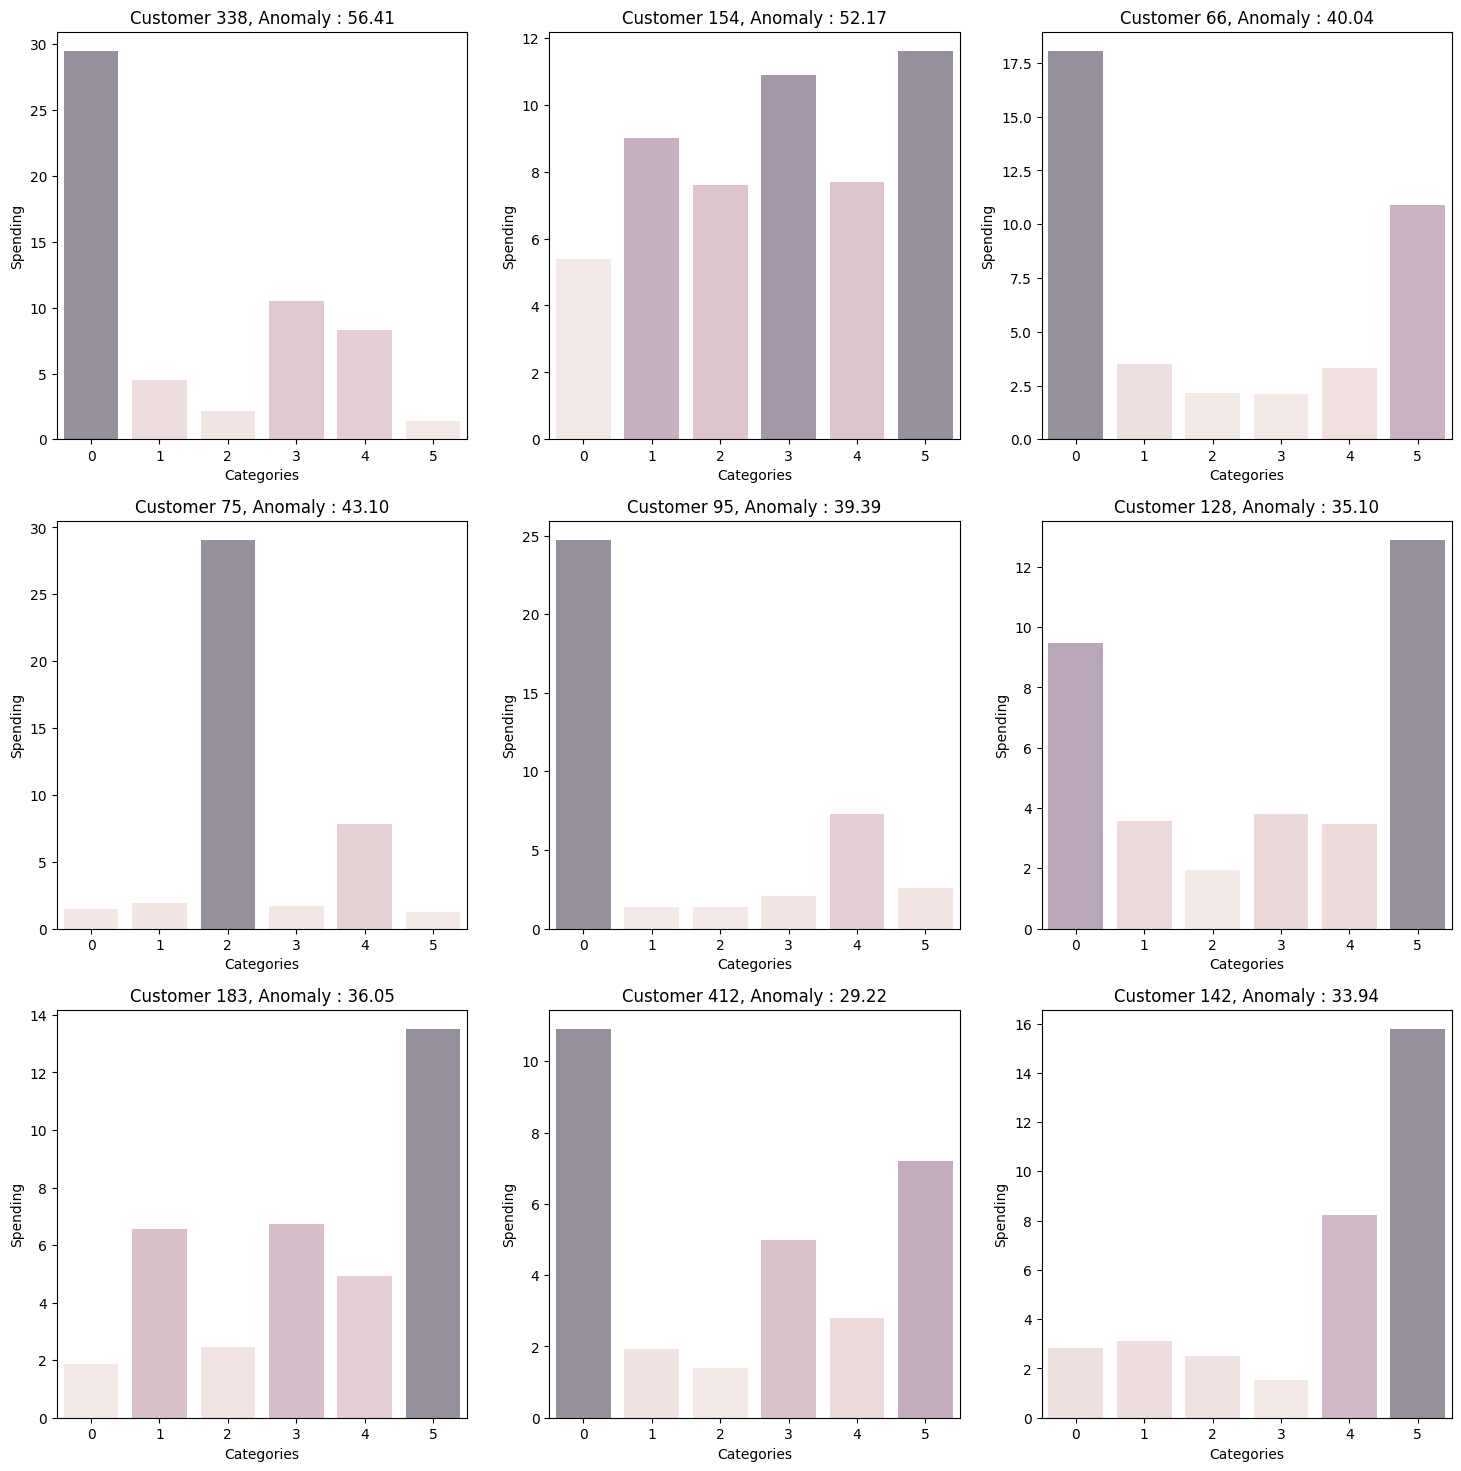

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

In [ ]:
# How different features contribute to Anomaly Score

indx = [338, 154, 66, 75, 95, 128, 183, 412, 142]

fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

for i, index in enumerate(indx):
  row = R.iloc[index]
  plt.figure(figsize=(5, 3))
  sns.barplot(x=row.index, y=row.values, hue =row.values, ax = axes[i], alpha =.50, legend = False)
  axes[i].set_title(f"Customer {index}, Anomaly : {df.loc[index, 'Anomaly_Scores']:.2f}")
  axes[i].set_xlabel('Categories')
  axes[i].set_ylabel('Spending')


plt.subplots_adjust(hspace=2)
plt.show()

### How Actual spending contributes to Anomaly Score ?

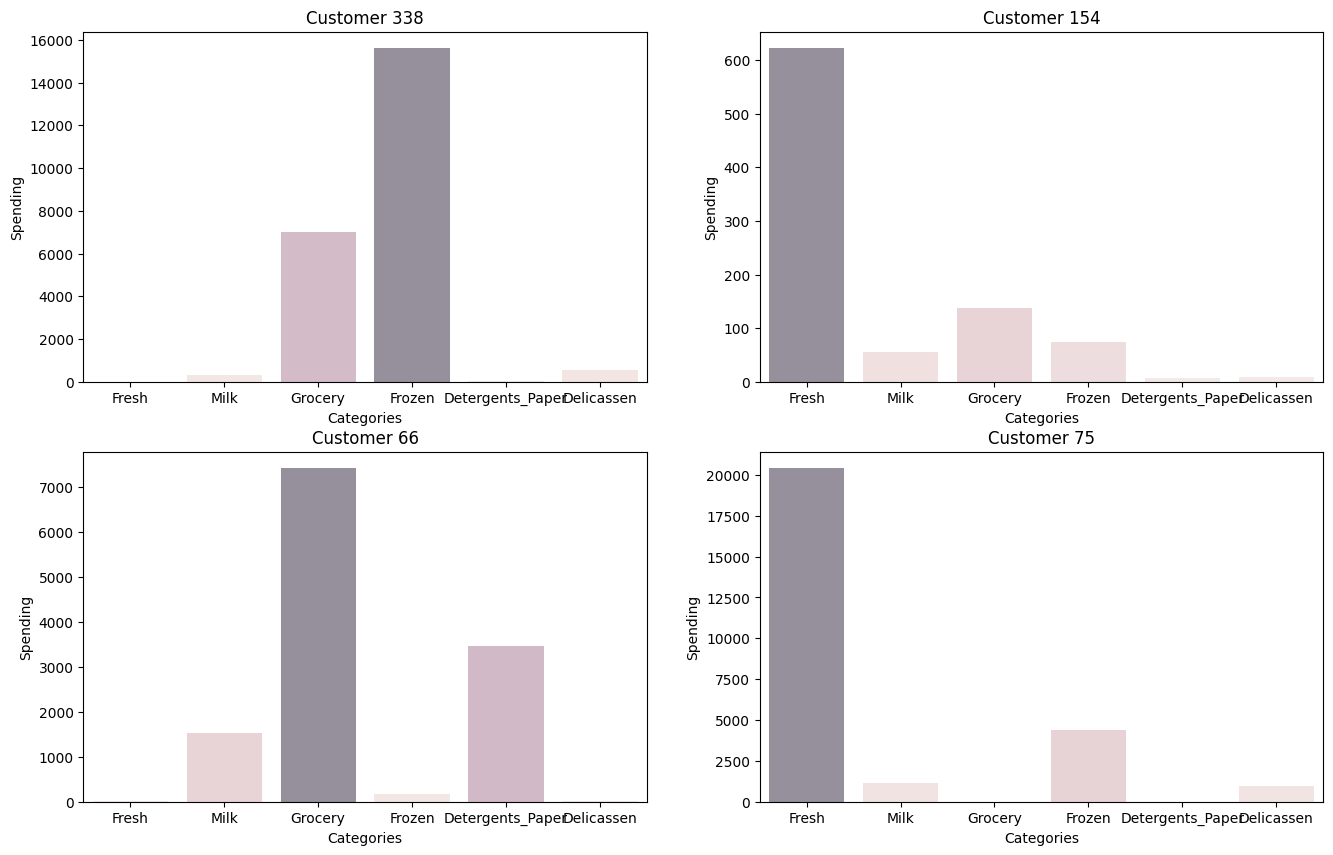

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

In [ ]:
# How different Spending contribute to Anomaly Score
indx = [338, 154, 66, 75]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, index in enumerate(indx):
  row = df_main.iloc[index]
  plt.figure(figsize=(5, 3))
  sns.barplot(x=row.index, y=row.values, hue =row.values, ax = axes[i], alpha =.50, legend = False)
  axes[i].set_title(f"Customer {index}")
  axes[i].set_xlabel('Categories')
  axes[i].set_ylabel('Spending')

plt.subplots_adjust(hspace=6)
plt.show()